
# **Heartbeat Prognostics: Unveiling Cardiac Futures**
##Jonathan Wan, Stephen Schwitzgebel, Natasha Dietz

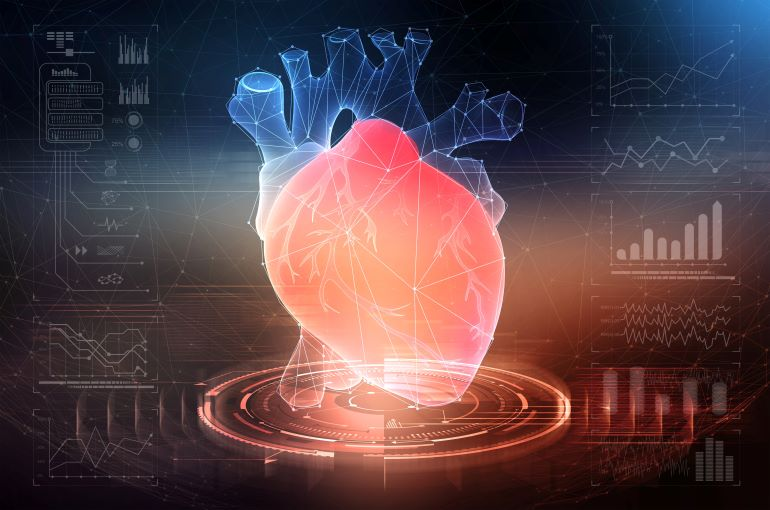



---



# **1. Introduction**:

Our project aims to leverage a subset of the Behavioral Risk Factor Surveillance System (BRFSS) dataset to predict heart disease among individuals. First we will establish a baseline model based on the BRFSS 2013 dataset, which is originally comprised of responses from 491,773 individuals, encompassing 336 features. However, our focus will be on a cleaned subset consisting of 384,695 survey responses from BRFSS 2013, containing 20 pertinent features.

Additional datasets from 2011 and 2015 using the same subset of features will be used as a comparison against this 2013-based model to determine whether this model can be extended for predictions within a margin of time in the near past and future.

The ultimate objective of this project is to develop a robust classification model capable of accurately predicting the likelihood of heart disease among individuals. By utilizing machine learning techniques, we aim to create a model that can assist in early detection and intervention, thereby potentially saving lives.

This project holds significant importance due to the pervasive impact of heart disease, which remains the leading cause of death globally. By developing an accurate prediction model, we can empower individuals to take proactive steps towards their cardiovascular health. Early identification of risk factors can prompt individuals to undergo regular screenings, adopt healthier lifestyles, and seek timely medical intervention, potentially reducing healthcare costs associated with reactive treatments.

## **1.1: Data Source**
![United_States_Centers_for_Disease_Contro![dataclean (1).png](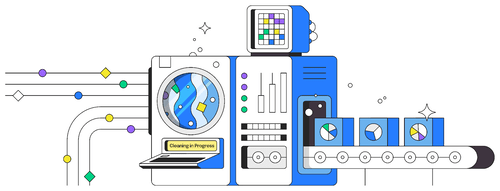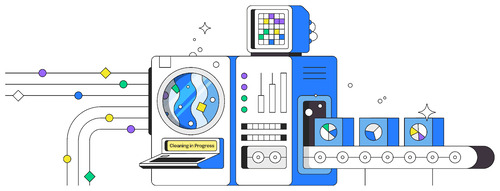)l_and_Prevention_logo.svg (2).png](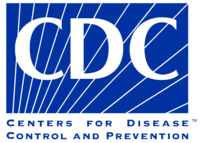)

Our data source is located in the input tab of the Kaggle dataset "[Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)". The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. The scope of the BRFSS survey is quite broad, asking over 350 questions in a typical year. One of the strengths of this dataset is that many of the responses are number-coded, meaning that most data is efficiently encoded as integers.

Although we initially wanted to compare data from across decades (say, 1995 to 2005 to 2015, etc.), the format of the raw data (in .ASCII and SAS formats) posed a barrier. As such, we decided to instead focus on a range of years already available in .csv format.

You also may notice that all years from 2011-2015 are available at the prior mentioned link, however the reason for focusing only on every other year is that the BRFSS survey questions varied every other year. Therefore, in order to keep our model features consistent we decided to look at only 2011, 2013, and 2015.




# **2. Import Relevant Packages**

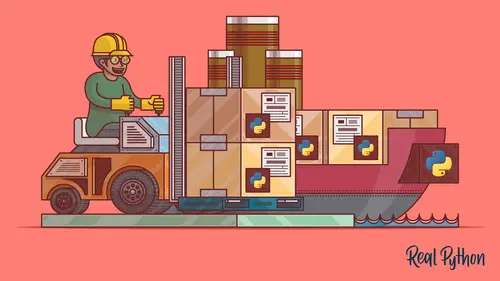


In [ ]:
# Data Manipulation
import os
import pandas as pd
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Balance sampling
from imblearn.over_sampling import SMOTE

# Pipe & PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# **3. Load Dataset**



In [ ]:
# Run this cell to authorize Colab to access your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# You'll need to load these three csvs locally to your drive via the link
# https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/input

# Remember to name .csv files exactly as shown below
brfss_2011_dataset = pd.read_csv('/content/drive/My Drive/brfss_2011.csv')
brfss_2013_dataset = pd.read_csv('/content/drive/My Drive/brfss_2013.csv')
brfss_2015_dataset = pd.read_csv('/content/drive/My Drive/brfss_2015.csv')

# **4. Clean Dataset**

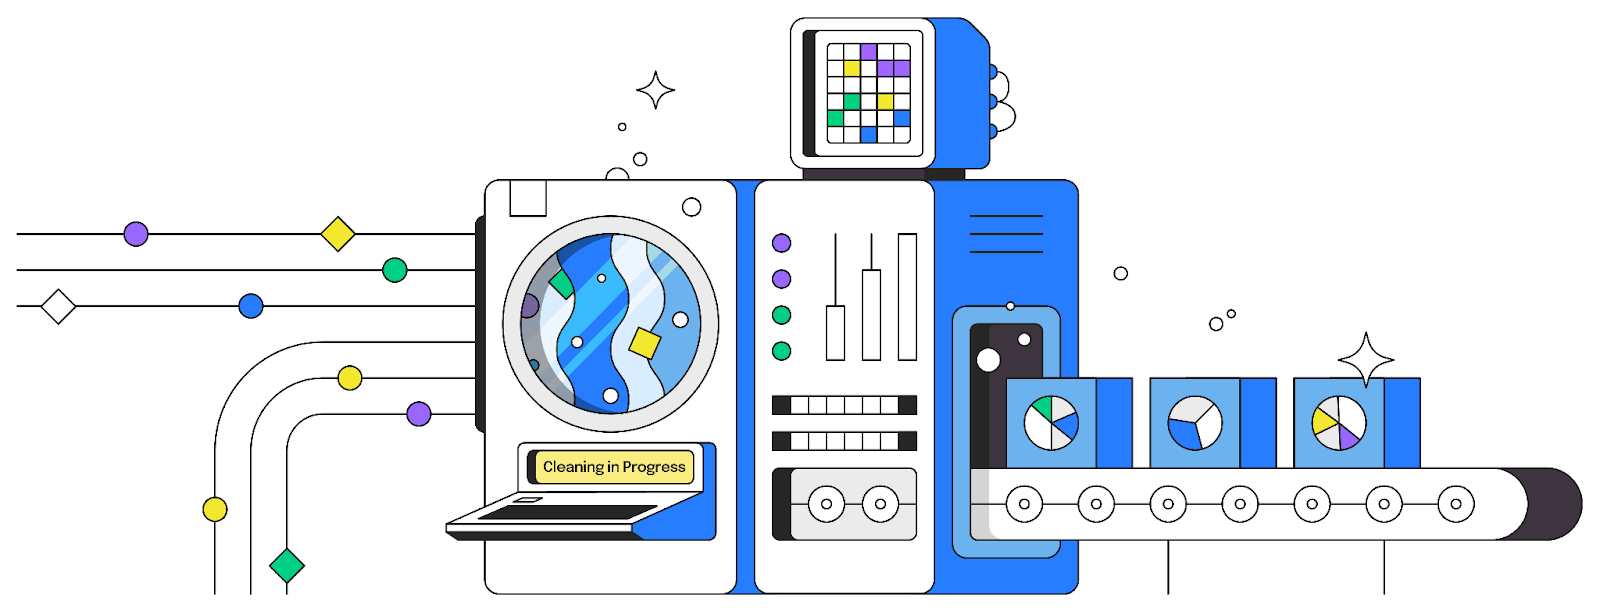

First, we'll select the 20 columns relevant to heart disease/attacks which Alex Teboul based on *Zidian Xie et al for Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques*, highlighting that "Research in the field has identified the following as important risk factors for heart disease and other chronic illnesses like diabetes...". Our methodology for selecting and cleaning these columns also references Alex's process detailed at this link: https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/notebook.

Risk Factors for Heart Disease:
 *(in no particular order)*


| Column Name       | Initial prediction for relationship with heart disease/heart attacks |
| :---------------- | :------     |
| High blood pressure | High importance
| High cholesterol | High importance
| Smoking | Medium importance
| Diabetes | High importance
| Obesity | Medium importance
| Age | High importance
| Sex | Neutral
| Race | Neutral
| Diet | Medium importance
| Exercise | Medium importance
| Alcohol consumption | Medium importance
| BMI | Medium importance
| Household income | Medium importance
| Marital status | Neutral
| Sleep | Neutral
| Time since last checkup | Neutral
| Education | Neutral
| Health care coverage | High importance
| Mental health | Neutral



In [ ]:
brfss_2011_df_selected = brfss_2011_dataset[['CVDINFR4', 'CVDCRHD4', '_RFHYPE5',
                                         'TOLDHI2', '_CHOLCHK',
                                         '_BMI5', 'SMOKE100',
                                         'CVDSTRK3', 'DIABETE3',
                                         '_TOTINDA', 'FRUIT1',
                                         '_RFDRHV4',
                                         'HLTHPLN1', 'MEDCOST',
                                         'GENHLTH', 'MENTHLTH',
                                         'PHYSHLTH',
                                         'SEX', '_AGEG5YR',
                                         'EDUCA', 'INCOME2' ]]

brfss_2013_df_selected = brfss_2013_dataset[['CVDINFR4', 'CVDCRHD4', '_RFHYPE5',
                                         'TOLDHI2', '_CHOLCHK',
                                         '_BMI5', 'SMOKE100',
                                         'CVDSTRK3', 'DIABETE3',
                                         '_TOTINDA', 'FRUIT1',
                                         '_RFDRHV4',
                                         'HLTHPLN1', 'MEDCOST',
                                         'GENHLTH', 'MENTHLTH',
                                         'PHYSHLTH',
                                         'SEX', '_AGEG5YR',
                                         'EDUCA', 'INCOME2' ]]

brfss_2015_df_selected = brfss_2015_dataset[['_MICHD', '_RFHYPE5',
                                         'TOLDHI2', '_CHOLCHK',
                                         '_BMI5', 'SMOKE100',
                                         'CVDSTRK3', 'DIABETE3',
                                         '_TOTINDA', 'FRUIT1',
                                         '_RFDRHV5',
                                         'HLTHPLN1', 'MEDCOST',
                                         'GENHLTH', 'MENTHLTH',
                                         'PHYSHLTH',
                                         'SEX', '_AGEG5YR',
                                         'EDUCA', 'INCOME2' ]]

We will go ahead and drop any rows with null values but keep any duplicate rows due to the limited number of duplicates in each dataset (< 2,000 per year). Note that in 2011, 2013, and 2015 there were 104,184, 107,078, and 108,367 rows with nulls respectively. This is not an insignificant number! In the future, with more time we could dig more into where these null values lie and if it would be possible to do some null-value reconciliation.

In [ ]:
# Drop any nulls in-place
print("2011 data: ")
print(brfss_2011_df_selected.shape, 'before dropping nulls')
brfss_2011_df_selected = brfss_2011_df_selected.dropna()
print(brfss_2011_df_selected.shape, 'after dropping nulls')

print("2013 data: ")
print(brfss_2013_df_selected.shape, 'before dropping nulls')
brfss_2013_df_selected = brfss_2013_df_selected.dropna()
print(brfss_2013_df_selected.shape, 'after dropping nulls')

print("2015 data: ")
print(brfss_2015_df_selected.shape, 'before dropping nulls')
brfss_2015_df_selected = brfss_2015_df_selected.dropna()
print(brfss_2015_df_selected.shape, 'after dropping nulls')


# # Find number of duplicate rows
num_dups11 =  brfss_2011_df_selected.shape[0] - brfss_2011_df_selected.drop_duplicates().shape[0]
num_dups13 =  brfss_2013_df_selected.shape[0] - brfss_2013_df_selected.drop_duplicates().shape[0]
num_dups15 =  brfss_2015_df_selected.shape[0] - brfss_2015_df_selected.drop_duplicates().shape[0]

print(num_dups11, "duplicate rows in 2011")
print(num_dups13, "duplicate rows in 2013")
print(num_dups15, "duplicate rows in 2015")

2011 data: 
(506467, 21) before dropping nulls
(402283, 21) after dropping nulls
2013 data: 
(491773, 21) before dropping nulls
(384695, 21) after dropping nulls
2015 data: 
(441456, 20) before dropping nulls
(333089, 20) after dropping nulls
1850 duplicate rows in 2011
1539 duplicate rows in 2013
1479 duplicate rows in 2015


###**4.1: Heart Disease and Heart Attacks**

We can reconcile the columns relating to heart disease and heart attacks by referring to each year's codebook. Since in 2015, this question is answered in column '_MICHD', we need only recode values of '2' to '0' in order to make the output binary.

Unfortunately in 2011 and 2013 there were separate questions for heart attacks and heart disease, therefore we need to code all answers equivalent to no's as 0, remove values equal to 7 (don't know) and 9 (refused), then combine the columns into one by performing a logical OR between them.

In [ ]:
# _MICHD (relevant to 2015)
# Change 2 to 0 because this means respondent did not have MI or CHD
brfss_2015_df_selected['_MICHD'] = brfss_2015_df_selected['_MICHD'].replace({2:0})

# CVDINFR4/CVDCRHD4 (relevant to 2011 & 2013)
# Change 2 to 0 because this means did not have MI or CHD
# Also remove 7 (don't knows) and 9 (refused)

# 2011
# CVDINFR4 refers to presence of heart attack
brfss_2011_df_selected['CVDINFR4'] = brfss_2011_df_selected['CVDINFR4'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDINFR4 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDINFR4 != 9]

# CVDINHD4 refers to presence of heart disease
brfss_2011_df_selected['CVDCRHD4'] = brfss_2011_df_selected['CVDCRHD4'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDCRHD4 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDCRHD4 != 9]

# 2013
# CVDINFR4 refers to presence of heart attack
brfss_2013_df_selected['CVDINFR4'] = brfss_2013_df_selected['CVDINFR4'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDINFR4 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDINFR4 != 9]

# CVDINHD4 refers to presence of heart disease
brfss_2013_df_selected['CVDCRHD4'] = brfss_2013_df_selected['CVDCRHD4'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDCRHD4 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDCRHD4 != 9]


# Combine CVDINFR4/CVDCRHD4 into _MICHD column based on 'or' logic
brfss_2011_df_selected['_MICHD'] = brfss_2011_df_selected.apply(lambda row: row['CVDINFR4'] or row['CVDCRHD4'], axis=1)
brfss_2013_df_selected['_MICHD'] = brfss_2013_df_selected.apply(lambda row: row['CVDINFR4'] or row['CVDCRHD4'], axis=1)

# Drop unneeded columns
brfss_2011_df_selected.drop(columns=['CVDINFR4', 'CVDCRHD4'], inplace=True)
brfss_2013_df_selected.drop(columns=['CVDINFR4', 'CVDCRHD4'], inplace=True)

# Check that output is in fact binary
print(brfss_2011_df_selected._MICHD.unique())
print(brfss_2013_df_selected._MICHD.unique())
print(brfss_2015_df_selected._MICHD.unique())

[0. 1.]
[0. 1.]
[0. 1.]


###**4.2: High Blood Pressure**

We code all 1's to 0's to represent a person not having high blood pressure, while we code all 2's to 1's to represent a person having high blood pressure, then remove all 9's (don't know/not sure/refused/missing).



In [ ]:
# _RFHYPE5 (relevant to 2011/2013/2015)
# Change 1 to 0 so it represents not high blood pressure and 2 to 1 so it represents high blood pressure
# Remove all 9's (don't know/not sure/refused/missing)
brfss_2011_df_selected['_RFHYPE5'] = brfss_2011_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected._RFHYPE5 != 9]

brfss_2013_df_selected['_RFHYPE5'] = brfss_2013_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected._RFHYPE5 != 9]

brfss_2015_df_selected['_RFHYPE5'] = brfss_2015_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected._RFHYPE5 != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected._RFHYPE5.unique())
print(brfss_2013_df_selected._RFHYPE5.unique())
print(brfss_2015_df_selected._RFHYPE5.unique())

[1. 0.]
[0. 1.]
[1. 0.]


###**4.3: High Blood Cholestorol**

We code all 2's to 0's to represent a person not having high blood cholesterol, while we code all 2's to 1's to represent a person having high blood cholesterol, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7's (don't knows) and all 9's (refused)
brfss_2011_df_selected['TOLDHI2'] = brfss_2011_df_selected['TOLDHI2'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.TOLDHI2 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.TOLDHI2 != 9]

brfss_2013_df_selected['TOLDHI2'] = brfss_2013_df_selected['TOLDHI2'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.TOLDHI2 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.TOLDHI2 != 9]

brfss_2015_df_selected['TOLDHI2'] = brfss_2015_df_selected['TOLDHI2'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.TOLDHI2 != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.TOLDHI2 != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected.TOLDHI2.unique())
print(brfss_2013_df_selected.TOLDHI2.unique())
print(brfss_2015_df_selected.TOLDHI2.unique())

[1. 0.]
[0. 1.]
[1. 0.]


<ipython-input-8-485bd15bc731>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_2015_df_selected['TOLDHI2'] = brfss_2015_df_selected['TOLDHI2'].replace({2:0})


###**4.4: Cholestorol Check**

We code all 3's and 2's to 0's to represent a person not getting their blood cholesterol checked, then remove all 9's (don't know/not sure/refused/missing).

In [ ]:
# _CHOLCHK
# Change 3 to 0 and 2 to 0 for not having checked their cholesterol in past 5 years
# Remove 9
brfss_2011_df_selected['_CHOLCHK'] = brfss_2011_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected._CHOLCHK != 9]

brfss_2013_df_selected['_CHOLCHK'] = brfss_2013_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected._CHOLCHK != 9]

brfss_2015_df_selected['_CHOLCHK'] = brfss_2015_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected._CHOLCHK != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected._CHOLCHK.unique())
print(brfss_2013_df_selected._CHOLCHK.unique())
print(brfss_2015_df_selected._CHOLCHK.unique())

[1. 0.]
[1. 0.]
[1. 0.]


###**4.5: Body Mass Index**

We don't need to make any adjustments to _BMI5, the measure of someone's BMI, as it is already coded as blank for missing/refused responses, and the other responses are integers from 1-9999.

In [ ]:
# No changes to _BMI5

###**4.6: Smoker**

We code all 2's to 0's to represent a person not being a smoker, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (don't knows)
# Remove all 9 (refused)
brfss_2011_df_selected['SMOKE100'] = brfss_2011_df_selected['SMOKE100'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.SMOKE100 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.SMOKE100 != 9]

brfss_2013_df_selected['SMOKE100'] = brfss_2013_df_selected['SMOKE100'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.SMOKE100 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.SMOKE100 != 9]

brfss_2015_df_selected['SMOKE100'] = brfss_2015_df_selected['SMOKE100'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.SMOKE100 != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.SMOKE100 != 9]


# Check that output is in fact binary
print(brfss_2011_df_selected.SMOKE100.unique())
print(brfss_2013_df_selected.SMOKE100.unique())
print(brfss_2015_df_selected.SMOKE100.unique())

<ipython-input-11-4564737e4a43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_2011_df_selected['SMOKE100'] = brfss_2011_df_selected['SMOKE100'].replace({2:0})


[1. 0.]
[0. 1.]
[1. 0.]


<ipython-input-11-4564737e4a43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_2013_df_selected['SMOKE100'] = brfss_2013_df_selected['SMOKE100'].replace({2:0})


###**4.7: Stroke**

We code all 2's to 0's to represent a person not being a smoker, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (don't knows)
# Remove all 9 (refused)
brfss_2011_df_selected['CVDSTRK3'] = brfss_2011_df_selected['CVDSTRK3'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDSTRK3 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.CVDSTRK3 != 9]

brfss_2013_df_selected['CVDSTRK3'] = brfss_2013_df_selected['CVDSTRK3'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDSTRK3 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.CVDSTRK3 != 9]

brfss_2015_df_selected['CVDSTRK3'] = brfss_2015_df_selected['CVDSTRK3'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.CVDSTRK3 != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.CVDSTRK3 != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected.CVDSTRK3.unique())
print(brfss_2013_df_selected.CVDSTRK3.unique())
print(brfss_2015_df_selected.CVDSTRK3.unique())

[0. 1.]
[0. 1.]
[0. 1.]


###**4.8: Diabetes**

We want to make answers range from 0 to 2, so we first code all 2's and 3's to 0's to represent a person not being a smoker, code 1's (has diabetes) as 2, and code 4's (pre-diabetes) as 1. 0 stays the same to indicate no presence of diabetes. Finally we can remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# DIABETE3
# To make this ordinal: 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (don't knows)
# Remove all 9 (refused)
brfss_2011_df_selected['DIABETE3'] = brfss_2011_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.DIABETE3 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.DIABETE3 != 9]

brfss_2013_df_selected['DIABETE3'] = brfss_2013_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.DIABETE3 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.DIABETE3 != 9]

brfss_2015_df_selected['DIABETE3'] = brfss_2015_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.DIABETE3 != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.DIABETE3 != 9]


# Check that output ranges from [0, 2]
print(brfss_2011_df_selected.DIABETE3.unique())
print(brfss_2013_df_selected.DIABETE3.unique())
print(brfss_2015_df_selected.DIABETE3.unique())

[0. 1. 2.]
[0. 2. 1.]
[0. 2. 1.]


###**4.9: Physical Activity**

We code all 2's to 0's to represent a person not being a smoker, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
brfss_2011_df_selected['_TOTINDA'] = brfss_2011_df_selected['_TOTINDA'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected._TOTINDA != 9]

brfss_2013_df_selected['_TOTINDA'] = brfss_2013_df_selected['_TOTINDA'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected._TOTINDA != 9]

brfss_2015_df_selected['_TOTINDA'] = brfss_2015_df_selected['_TOTINDA'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected._TOTINDA != 9]


# Check that output is in fact binary
print(brfss_2011_df_selected._TOTINDA.unique())
print(brfss_2013_df_selected._TOTINDA.unique())
print(brfss_2015_df_selected._TOTINDA.unique())

[0. 1.]
[1. 0.]
[0. 1.]


###**4.10: Fruit**

This field is perhaps the most complicated of all the features. The question reads "During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?". This means that answers were given in the form of days per week, days per month, not sure, none, refused, and missing. The series of if/else statements parses out the days per week/month to compute whether a person surpassed having at least one fruit per day.

In [ ]:
# FRUIT1

# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day
# remove all dont knows and missing 9
def replace_fruits(x):
  if x['FRUIT1'] < 200:  # since 101-199 means at least once per day
    return 1
  elif (x['FRUIT1'] > 207 and x['FRUIT1'] < 300):  # since 207 is 7 times per week
    return 1
  elif (x['FRUIT1'] > 330 and x['FRUIT1'] < 400):   # since 330 is 30 times a month
    return 1
  else:
    return 0

brfss_2011_df_selected['FRUIT1'] = brfss_2011_df_selected['FRUIT1'].replace({555:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.FRUIT1 != 777]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.FRUIT1 != 999]
brfss_2011_df_selected['FRUIT1'] = brfss_2011_df_selected.apply(replace_fruits, axis=1)

brfss_2013_df_selected['FRUIT1'] = brfss_2013_df_selected['FRUIT1'].replace({555:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.FRUIT1 != 777]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.FRUIT1 != 999]
brfss_2013_df_selected['FRUIT1'] = brfss_2013_df_selected.apply(replace_fruits, axis=1)

brfss_2015_df_selected['FRUIT1'] = brfss_2015_df_selected['FRUIT1'].replace({555:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.FRUIT1 != 777]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.FRUIT1 != 999]
brfss_2015_df_selected['FRUIT1'] = brfss_2015_df_selected.apply(replace_fruits, axis=1)

# Check that output is in fact binary
print(brfss_2011_df_selected.FRUIT1.unique())
print(brfss_2013_df_selected.FRUIT1.unique())
print(brfss_2015_df_selected.FRUIT1.unique())

[0 1]
[0 1]
[0 1]


We're almost done...

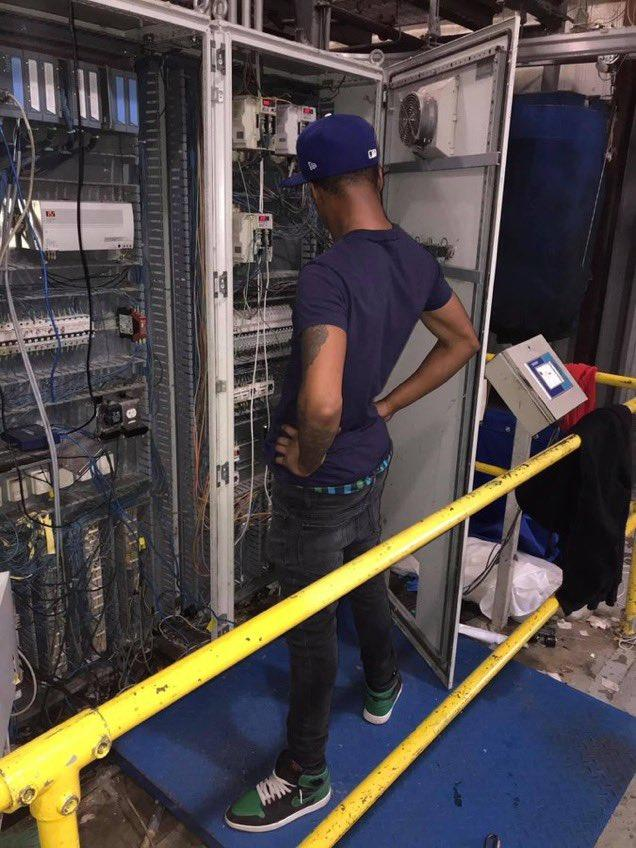

###**4.11: Heavy Drinker**

We code all 1's to 0's to represent a person not being a heavy drinker, code all 2's to 1's for those that are heavy drinkers, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
#_RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_2011_df_selected['_RFDRHV4'] = brfss_2011_df_selected['_RFDRHV4'].replace({1:0, 2:1})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected._RFDRHV4 != 9]

brfss_2013_df_selected['_RFDRHV4'] = brfss_2013_df_selected['_RFDRHV4'].replace({1:0, 2:1})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected._RFDRHV4 != 9]

brfss_2015_df_selected['_RFDRHV5'] = brfss_2015_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected._RFDRHV5 != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected._RFDRHV4.unique())
print(brfss_2013_df_selected._RFDRHV4.unique())
print(brfss_2015_df_selected._RFDRHV5.unique())

[0. 1.]
[0. 1.]
[0. 1.]


###**4.12: Health Care Access**

We code all 2's to 0's to represent a person not being a heavy drinker, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
brfss_2011_df_selected['HLTHPLN1'] = brfss_2011_df_selected['HLTHPLN1'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.HLTHPLN1 != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.HLTHPLN1 != 9]

brfss_2013_df_selected['HLTHPLN1'] = brfss_2013_df_selected['HLTHPLN1'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.HLTHPLN1 != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.HLTHPLN1 != 9]

brfss_2015_df_selected['HLTHPLN1'] = brfss_2015_df_selected['HLTHPLN1'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.HLTHPLN1 != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.HLTHPLN1 != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected.HLTHPLN1.unique())
print(brfss_2013_df_selected.HLTHPLN1.unique())
print(brfss_2015_df_selected.HLTHPLN1.unique())

[1. 0.]
[1. 0.]
[1. 0.]


###**4.13: Cost Barrier to See Doctor**

We code all 2's to 0's to represent a person not encountering a financial barrier to health care, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
brfss_2011_df_selected['MEDCOST'] = brfss_2011_df_selected['MEDCOST'].replace({2:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.MEDCOST != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.MEDCOST != 9]

brfss_2013_df_selected['MEDCOST'] = brfss_2013_df_selected['MEDCOST'].replace({2:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.MEDCOST != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.MEDCOST != 9]

brfss_2015_df_selected['MEDCOST'] = brfss_2015_df_selected['MEDCOST'].replace({2:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.MEDCOST != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.MEDCOST != 9]

# Check that output is in fact binary
print(brfss_2011_df_selected.MEDCOST.unique())
print(brfss_2013_df_selected.MEDCOST.unique())
print(brfss_2015_df_selected.MEDCOST.unique())

[0. 1.]
[0. 1.]
[0. 1.]


<ipython-input-18-f2b8dcd4cbd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_2011_df_selected['MEDCOST'] = brfss_2011_df_selected['MEDCOST'].replace({2:0})


###**4.14: General Health**

Keep as is, ranging from 1-5, 1 being the best level of general health, then remove all 7's and 9's (don't know/not sure/refused/missing).

In [ ]:
# GENHLTH
# Keeping this is an ordinal variable (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.GENHLTH != 7]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.GENHLTH != 9]

brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.GENHLTH != 7]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.GENHLTH != 9]

brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.GENHLTH != 7]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.GENHLTH != 9]

# Check that output ranges from [1,5]
print(brfss_2011_df_selected.GENHLTH.unique())
print(brfss_2013_df_selected.GENHLTH.unique())
print(brfss_2015_df_selected.GENHLTH.unique())

[4. 2. 5. 3. 1.]
[3. 2. 4. 1. 5.]
[5. 3. 2. 4. 1.]


###**4.15: Mental Health**

Keep as is, ranging from 0-30 days of bad mental health, then remove all 77's and 99's (don't know/not sure/refused).

In [ ]:
#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_2011_df_selected['MENTHLTH'] = brfss_2011_df_selected['MENTHLTH'].replace({88:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.MENTHLTH != 77]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.MENTHLTH != 99]

brfss_2013_df_selected['MENTHLTH'] = brfss_2013_df_selected['MENTHLTH'].replace({88:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.MENTHLTH != 77]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.MENTHLTH != 99]

brfss_2015_df_selected['MENTHLTH'] = brfss_2015_df_selected['MENTHLTH'].replace({88:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.MENTHLTH != 77]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.MENTHLTH != 99]

# Check that output ranges from [0,30]
print(brfss_2011_df_selected.MENTHLTH.unique())
print(brfss_2013_df_selected.MENTHLTH.unique())
print(brfss_2015_df_selected.MENTHLTH.unique())

[30.  3. 15.  0.  2.  5. 10.  7.  4. 28. 20. 25.  1. 12.  6. 14. 18. 21.
  8.  9. 29. 26. 27. 16. 17. 24. 22. 23. 11. 13. 19.]
[ 0.  2. 15.  1.  3.  5.  8.  7. 10. 30.  4. 20. 21.  6. 14. 25. 12. 16.
 29. 28.  9. 13. 17. 26. 27. 18. 24. 23. 11. 22. 19.]
[18.  0. 30.  3.  2.  5. 15. 10.  1.  6. 20. 25. 29.  4.  7.  8. 21. 14.
 26.  9. 16. 28. 11. 12. 24. 17. 13. 23. 27. 19. 22.]


###**4.16: Physical Health**

Keep as is, ranging from 0-30 days of bad physical health, then remove all 77's and 99's (don't know/not sure/refused).

In [ ]:
# PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_2011_df_selected['PHYSHLTH'] = brfss_2011_df_selected['PHYSHLTH'].replace({88:0})
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.PHYSHLTH != 77]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.PHYSHLTH != 99]

brfss_2013_df_selected['PHYSHLTH'] = brfss_2013_df_selected['PHYSHLTH'].replace({88:0})
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.PHYSHLTH != 77]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.PHYSHLTH != 99]

brfss_2015_df_selected['PHYSHLTH'] = brfss_2015_df_selected['PHYSHLTH'].replace({88:0})
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.PHYSHLTH != 77]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.PHYSHLTH != 99]

# Check that output ranges from [0,30]
print(brfss_2011_df_selected.PHYSHLTH.unique())
print(brfss_2013_df_selected.PHYSHLTH.unique())
print(brfss_2015_df_selected.PHYSHLTH.unique())

[ 0. 25.  2. 15. 20. 30.  7. 10.  1.  5.  3.  4. 14.  6. 21.  8. 16. 27.
 23.  9. 29. 12. 26. 13. 28. 18. 17. 11. 22. 24. 19.]
[ 0.  3.  2. 10.  1. 30. 14.  4. 15. 25.  5. 20. 28.  8. 26.  7. 12. 11.
 17.  6. 22. 21.  9. 29. 13. 16. 19. 18. 23. 27. 24.]
[15.  0. 30. 20.  2. 14. 28.  7.  3. 10.  1.  5. 17.  4. 19.  6. 21. 12.
  8. 25. 27. 22. 29. 24.  9. 16. 13. 18. 23. 26. 11.]


<ipython-input-21-e37337def31f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brfss_2015_df_selected['PHYSHLTH'] = brfss_2015_df_selected['PHYSHLTH'].replace({88:0})


###**4.17: Sex**

Code 2's to 0's, in other words - is respondent male (somewhat arbitrarily chose this change because men are typially at higher risk for heart disease).

In [ ]:
# SEX
# change 2 to 0 (female as 0). Male is 1
brfss_2011_df_selected['SEX'] = brfss_2011_df_selected['SEX'].replace({2:0})
brfss_2013_df_selected['SEX'] = brfss_2013_df_selected['SEX'].replace({2:0})
brfss_2015_df_selected['SEX'] = brfss_2015_df_selected['SEX'].replace({2:0})

# Check that output is in fact binary
print(brfss_2011_df_selected.SEX.unique())
print(brfss_2013_df_selected.SEX.unique())
print(brfss_2015_df_selected.SEX.unique())

[0. 1.]
[0. 1.]
[0. 1.]


###**4.18: Age**

Already ordinal in 13 ranges of 5-year increments each. Remove 14 because it's don't know/missing.

In [ ]:
# _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 with 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected._AGEG5YR != 14]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected._AGEG5YR != 14]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected._AGEG5YR != 14]

# Check that output ranges from 1 to 13
print(brfss_2011_df_selected._AGEG5YR.unique())
print(brfss_2013_df_selected._AGEG5YR.unique())
print(brfss_2015_df_selected._AGEG5YR.unique())

[ 9.  7. 13.  2. 10.  8.  5.  6. 11.  1. 12.  3.  4.]
[ 7.  8.  9. 10.  6.  4. 11. 12.  5.  3.  1. 13.  2.]
[ 9.  7. 11. 10. 13.  8.  4.  6.  2. 12.  5.  1.  3.]


###**4.19: Education**

Already ordinal in 6 ranges with 1 being lowest amount of education and 6 being the highest. Remove 9 because it's refused.

In [ ]:
# EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.EDUCA != 9]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.EDUCA != 9]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.EDUCA != 9]

# Check that output ranges from 1 to 6
print(brfss_2011_df_selected.EDUCA.unique())
print(brfss_2013_df_selected.EDUCA.unique())
print(brfss_2015_df_selected.EDUCA.unique())

[4. 3. 6. 5. 2. 1.]
[5. 6. 4. 2. 3. 1.]
[4. 6. 5. 3. 2. 1.]


###**4.20: Income**

Already ordinal in 8 ranges with 1 being lowest amount of income and 6 being the highest. Remove 77 and 99 because they represent don't know and refused.

In [ ]:
# INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.INCOME2 != 77]
brfss_2011_df_selected = brfss_2011_df_selected[brfss_2011_df_selected.INCOME2 != 99]

brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.INCOME2 != 77]
brfss_2013_df_selected = brfss_2013_df_selected[brfss_2013_df_selected.INCOME2 != 99]

brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.INCOME2 != 77]
brfss_2015_df_selected = brfss_2015_df_selected[brfss_2015_df_selected.INCOME2 != 99]

# Check that output ranges from 1 to 8
print(brfss_2011_df_selected.INCOME2.unique())
print(brfss_2013_df_selected.INCOME2.unique())
print(brfss_2015_df_selected.INCOME2.unique())

[4. 1. 7. 6. 2. 5. 8. 3.]
[8. 7. 6. 4. 1. 5. 2. 3.]
[3. 1. 8. 6. 4. 7. 2. 5.]


In [ ]:
# Check the shape of the dataset now:
print('2011 shape: ', brfss_2011_df_selected.shape)
print('2013 shape: ', brfss_2013_df_selected.shape)
print('2015 shape: ', brfss_2015_df_selected.shape)

2011 shape:  (315133, 20)
2013 shape:  (305449, 20)
2015 shape:  (261368, 20)


In [ ]:
# Rename the columns to make them more readable
cols = {'_MICHD':'HeartDiseaseorAttack',
        '_RFHYPE5':'HighBP',
        'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck',
        '_BMI5':'BMI',
        'SMOKE100':'Smoker',
        'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes',
        '_TOTINDA':'PhysActivity',
        'FRUIT1':'Fruits',
        '_RFDRHV5':'HvyAlcoholConsump', '_RFDRHV4':'HvyAlcoholConsump',
        'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost',
        'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth',
        'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' }

brfss_2011_df_selected = brfss_2011_df_selected.rename(columns = cols)
brfss_2013_df_selected = brfss_2013_df_selected.rename(columns = cols)
brfss_2015_df_selected = brfss_2015_df_selected.rename(columns = cols)

brfss_2013_df_selected.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'Sex', 'Age', 'Education', 'Income', 'HeartDiseaseorAttack'],
      dtype='object')

We're finally done cleaning!

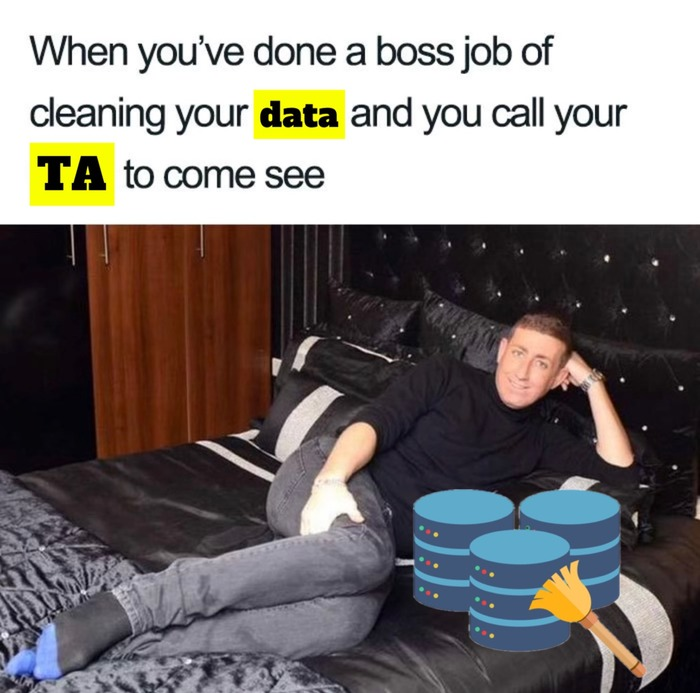

# **5. Exploratory Data Analysis**
## *On 2013 Dataset*
As previously stated in the introduction, we will be using the 2013 dataset as our baseline for our machine learning models.

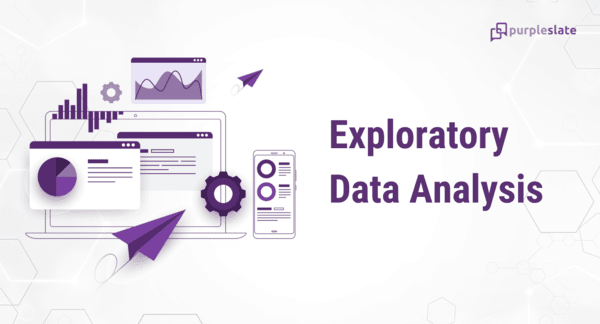




We'll now view the first five rows of our cleaned dataset to get an idea of what our data looks like post-cleaning. The type and range of values for each column looks as expected, so we can continue on to understanding each of the features a little better.



In [ ]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
heart_df = brfss_2013_df_selected.copy()
heart_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,HeartDiseaseorAttack
1,0.0,0.0,1.0,1822.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,8.0,0.0
2,0.0,0.0,0.0,2746.0,1.0,0.0,0.0,0.0,0,1.0,1.0,0.0,3.0,2.0,3.0,0.0,8.0,6.0,8.0,0.0
3,0.0,1.0,1.0,2197.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,9.0,4.0,7.0,0.0
4,1.0,0.0,1.0,3594.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,3.0,2.0,10.0,1.0,10.0,6.0,6.0,0.0
5,1.0,1.0,1.0,3986.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,6.0,6.0,8.0,0.0


## **5.1: Feature Descriptions**
As noted in section 4, we've chosen 20 features which may influence the risk of heart disease/attack from our starting dataset. The names and descriptions for the possible values of our selected features are displayed in the table below.



| Column Name       | Description |
| :---------------- | :------     |
| HeartDiseaseorAttack |   0 = does not have coronary heart disease (CHD) or myocardial infarction (MI);  1 = has had CHD or MI      |
| HighBP               |   0 = no high BP; 1 = high BP     |
| HighChol             |  0 = no high cholestorol; 1 = high cholestorol     |
| CholCheck            |  0 = no cholesterol check in last 5 years; 1 = cholesterol check in last 5 years     |
| BMI                  |   respondent's BMI      |
| Smoker               |   0 = respondent has not smoked at least 5 packs in entire life; 1 = respondent has smoked at least 5 packs in entire life     |
| Stroke               |  0 = has not had a stroke before; 1 = has had a stroke before     |
| Diabetes             |  0 = no diabetes; 1 = has diabetes      |
| PhysActivity         |   0 = no physical activitiy in last 30 days (not incl. job); 1 = has had physical activity in last 30 days      |
| Fruits               |   0 = does not consume fruit 1 or more times per day; 1 = consumes fruit 1 or more times per day      |
| HvyAlcoholConsump    |  0 = adult men < 14 drinks per week, adult women < 7 drinks per week; 1 = adult men >= 14 drinks per week, adult women >= 7 drinks per week      |
| AnyHealthcare        |   0 = does not have any form of health care coverage; 1 = has health care coverage      |
| NoDocbcCost          |   0 = did see doctor when needed in past year despite financial barriers; 1 =  did not see doctor when needed in past year due to financial barriers     |
| GenHlth              |  General health is: 1 = excellent; 2 = very good, 3 = good, 4 = fair, 5 = poor      |
| MentHlth             |  total number of days in last month with poor mental health    |
| PhysHlth             |   total number of days in last month with physical illness or injury    |
| Sex                  |  0 = female; 1 = male      |
| Age                  |  13-level age category: 1 = 18-24; 9 = 60-64; 13 = 80 or older; 14 = don't know/refused/missing      |
| Education            |   6-level education level: 1 = never attended school/kindergarten; 2 = elementary; etc.      |
| Income               |   8-level income scale: 1 = less than \$10,000; 5 = less than \$35,000; 8 = \$75,000 or more      |

All columns values are represented by whole numbers, the majority of which are binary (0 or 1). This gives us a relatively straightforward dataset to work with when performing data analysis.

In [ ]:
heart_df.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                    int64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
HeartDiseaseorAttack    float64
dtype: object

We can confirm from *count*  that no null values exist. Intuitively we can confirm that the binary columns have mins, maxes, and quartiles that are binary themselves.

Perhaps more interestingly, the low value of HeartDiseaseofAttack (< 0.1) is indicative of the high number of data points which make up the set of those respondents who have not had a heart attack or heart disease. This will be depicted in section 5.3.

In [ ]:
heart_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,HeartDiseaseorAttack
count,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000,305449.000000
mean,0.430317,0.435114,0.960884,2815.292271,0.457736,0.041480,0.290553,0.747706,0.514380,0.056258,0.919790,0.105392,2.531054,3.238701,4.302731,0.421737,7.928914,4.988227,5.818768,0.095960
std,0.495121,0.495773,0.193872,615.231870,0.498211,0.199398,0.691855,0.434330,0.499794,0.230420,0.271618,0.307059,1.085577,7.504341,8.774721,0.493838,3.079855,1.004693,2.132623,0.294537
min,0.000000,0.000000,0.000000,1207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,2402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,0.000000,0.000000,1.000000,2720.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,3109.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,9145.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [ ]:
print("Shape:", heart_df.shape[0], 'rows,', heart_df.shape[1], 'columns')

Shape: 305449 rows, 20 columns


## **5.2: Feature with the highest correlation to Heart Disease (HD) or Heart Attack**

GenHealth is the feature describing the General health of participants which is on a 1-5 scale
- GenHealth is represented by a 5-point scale as follows: 1 = excellent; 2 = very good, 3 = good, 4 = fair, 5 = poor
- With a correlation score of 0.26 between GenHealth and HeartDiseaseOrAttack, this indicates a potential 'positive' correlation of general health reports and heart disease/attack.
- In other words, the higher your general health rating is, the more poor your general health is, then more likely you will have heart disease/attack.


The feature with the highest correlation to heart disease or attack is: GenHlth


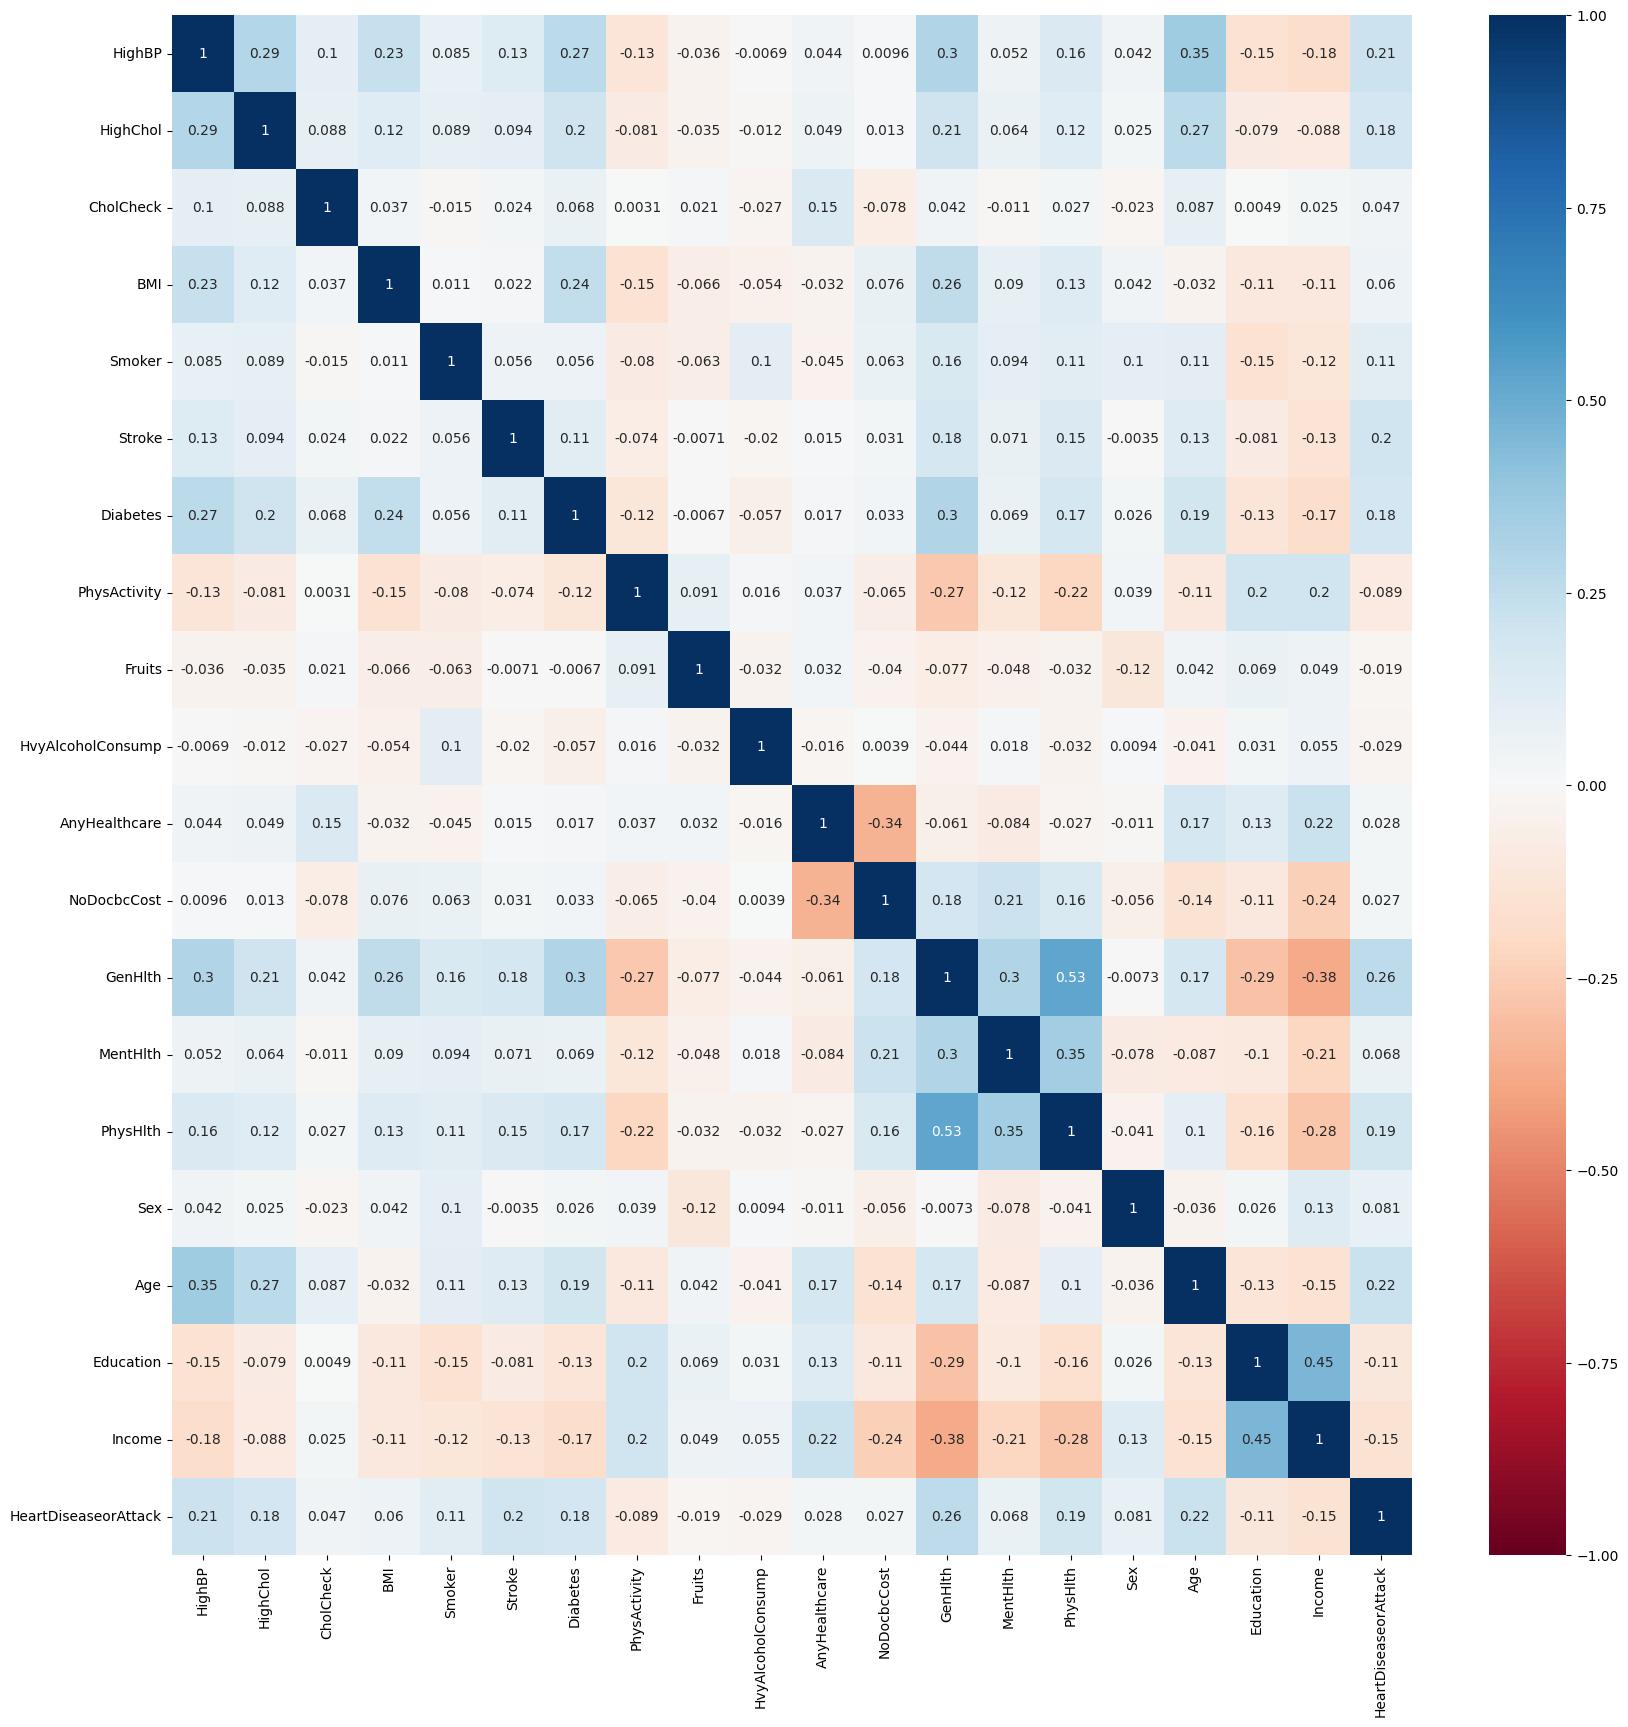

In [ ]:
# Calculate pairwise correlations
corr_matrix = heart_df.corr()

#Plot correlation heatmap
fig, ax = plt.subplots(figsize=(20, 20))
corr_mat = sns.heatmap(heart_df.corr(), cmap='RdBu', vmin=-1, annot=True, vmax=1, ax=ax)

# Find the correlation of 'HD' with all predictor variables
corr_HD = corr_matrix['HeartDiseaseorAttack']

# Find the predictor with the highest positive correlation
highest_corr = corr_HD.drop('HeartDiseaseorAttack').idxmax()

print(f"The feature with the highest correlation to heart disease or attack is: {highest_corr}")

##**5.3: Plot and Visualize the Target Variable Distribution**

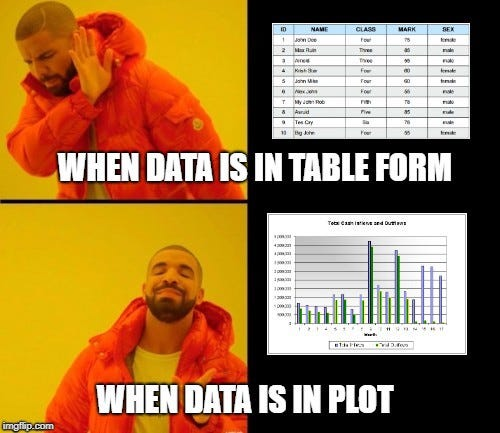

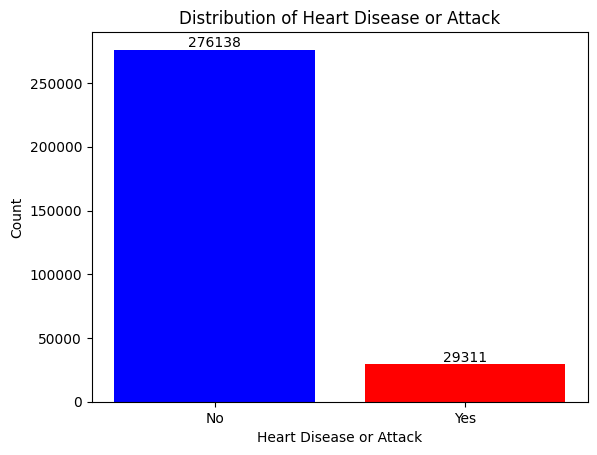

In [ ]:
# Count the occurrences of each unique value in the "HeartDiseaseorAttack" column
heart_disease_counts = heart_df['HeartDiseaseorAttack'].value_counts()

# Define colors for the bars (Blue for "No", Red for "Yes")
colors = ['blue', 'red']

# Create a bar plot with specified colors
bars = plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=colors)

# Add labels for each bar
for bar, count in zip(bars, heart_disease_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease or Attack')
plt.xticks(heart_disease_counts.index, ['No', 'Yes'])

plt.show()

**Imbalanced Target variable**
- Notice that our distribution of heart disease/attack is heavily skewed towards 'No'.
- This makes sense as we should expect a general population to not have experienced heart disease/attack than do.
- We will make note of this unbalanced dataset when training our models.

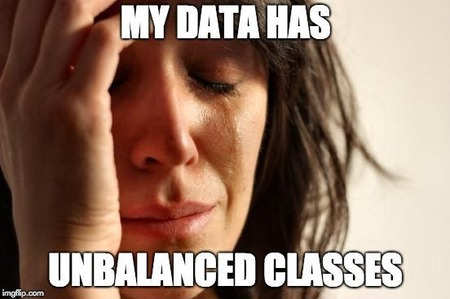

## **5.4: Plot and Visualize the Potential Predictors Distributions**

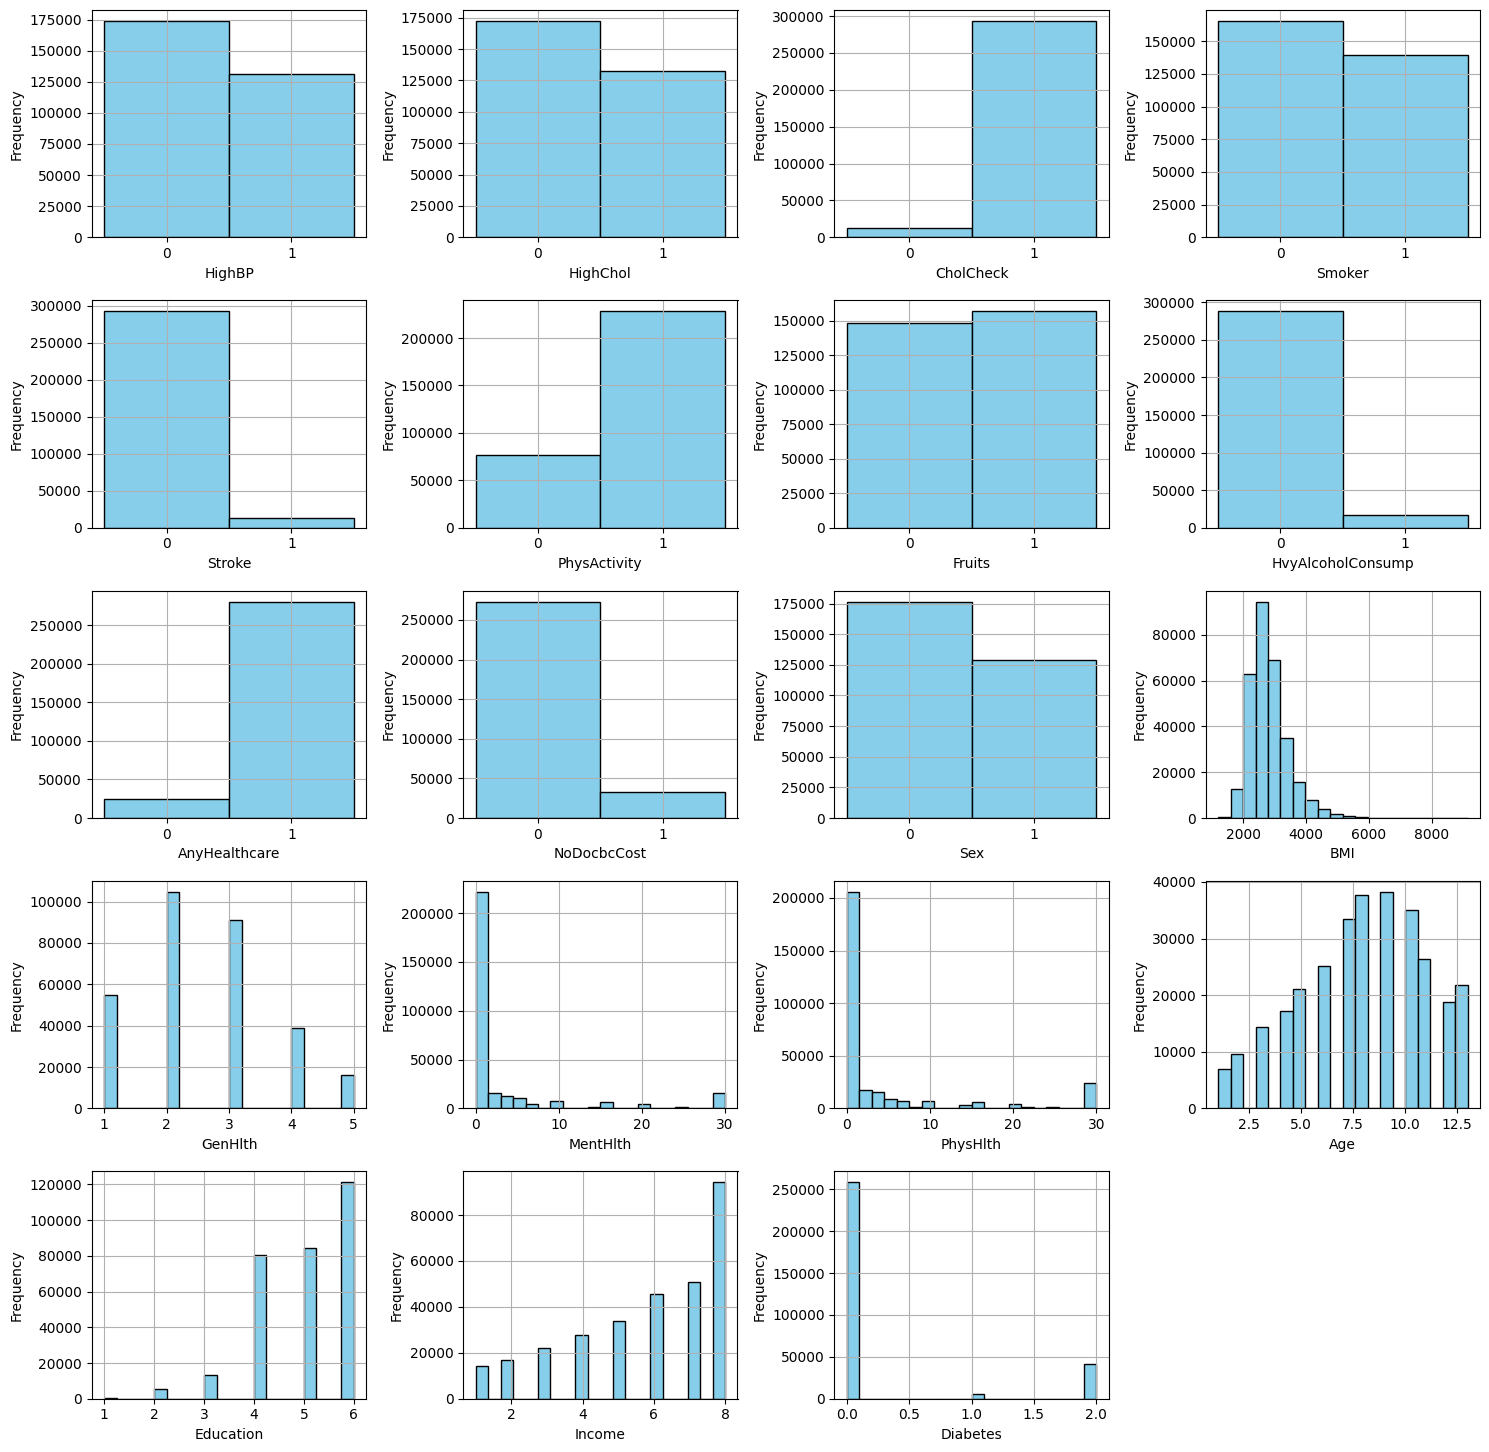

In [ ]:
# List of binary feature variables
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity',
                            'Fruits', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                            'Sex']

# List of non-binary feature variables
non_binary_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'Diabetes']

# Plot histograms for binary feature variables
plt.figure(figsize=(15, 20))

for i, feature in enumerate(binary_features, start=1):
    plt.subplot(7, 4, i)
    plt.hist(heart_df[feature], bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks([0, 1])  # Set x-axis ticks to display only 0 and 1
    plt.grid(True)

# Plot histograms for non-binary feature variables
for i, feature in enumerate(non_binary_features, start=len(binary_features) + 1):
    plt.subplot(7, 4, i)
    plt.hist(heart_df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Binary Distributions Findings**
- HighBP, HighChol, and Smoker, have similar skewed distributions where there are more cases of No (0) than Yes (1).
  - In other words, more people don't have High Blood Pressure, don't have High Cholesterol, and don't Smoke (i.e., smoked at least 5 packs in entire life).
  - This should be expected of a general population, and expected since majority of our dataset is skewed towards No Heart Disease/Attack.

**Non-Binary Distributions Findings**
- Age and BMI seem to have a relatively normal distribution
- An interesting find is income and education are skewed left. According to [OurWorldInData](https://ourworldindata.org/the-history-of-global-economic-inequality), we would typically expect the average populations' income to be skewed right. In other words, we would expect majority of our data to have lower income. However, this difference in skewed expectation can be due to how our Income feature has been framed since the Income feature is on an 8-level income scale:
  - 1 = less than \$10,000
  - 5 = less than \$35,000
  - 8 = \$75,000 or more
- Other factors for the skewedness could be a bias in how our data was sampled. For example, maybe those with higher income (and education) are more likely to report for the study.


#**6. Decision Tree**

## **6.1: Decision Tree Classifier on Unbalanced Dataset**
- We will first run a Decision Tree Classifier on our current dataset where our target variable (heart disease/attack) is imbalanced to set our initial baseline
- Decision Trees are common models for classification problems as they are intuitive and easy to interpret, making them a great starting point for understanding how different features contribute to the prediction of heart disease.

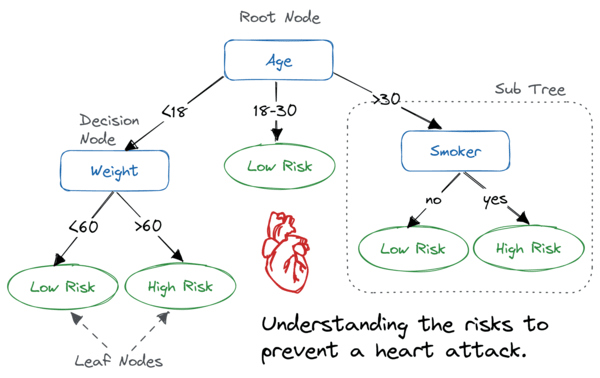


In [ ]:
X = heart_df.drop('HeartDiseaseorAttack', axis=1)
y = heart_df['HeartDiseaseorAttack']

# Split training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Metrics for Decision Tree (imbalanced)
Accuracy: 0.8496480602389916
Precision: 0.25488698839340257
Recall: 0.2793305439330544
F1 Score: 0.2665495488301525


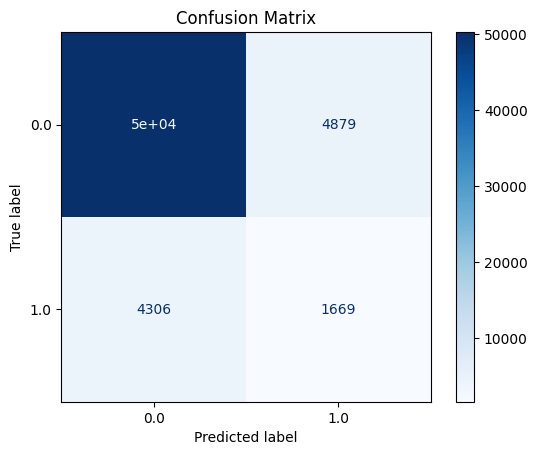

In [ ]:
# Create Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Metrics for Decision Tree (imbalanced)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

###**6.1.1: Decision Tree Results (unbalanced)**
- Our Decision Tree Classifier has an accuracy of 85%, which indicates the proportion of correctly classified instances overall. However, when considering imbalanced data, accuracy alone may not provide a complete picture of the model's performance. In our case, the Precision, Recall, and F1 Scores offer additional insights.

### Precision
- Precision represents the proportion of true positive predictions among all positive predictions made by the model. It indicates the model's ability to correctly identify instances of heart disease/attack among all instances it predicted as positive.

### Recall
- Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive instances in the dataset. It represents the model's ability to capture all instances of heart disease/attack, minimizing false negatives.

### F1
- F1 Score is the harmonic mean of Precision and Recall. It balances both measures, providing a single metric that considers both false positives and false negatives.


### Increasing Recall
- In the context of predicting medical conditions like heart disease/attack, maximizing Recall is crucial. A high Recall ensures that the model correctly identifies as many cases of heart disease/attack as possible, minimizing the chances of missing potentially critical instances (false negatives).

- Therefore, in our case, although the accuracy is relatively high, improving Recall is priority to enhance the model's ability to detect instances of heart disease/attack effectively.
- We will continue adjusting the model's parameters, feature selection, dimensionality reduction, and exploring other algorithms that prioritize Recall optimization

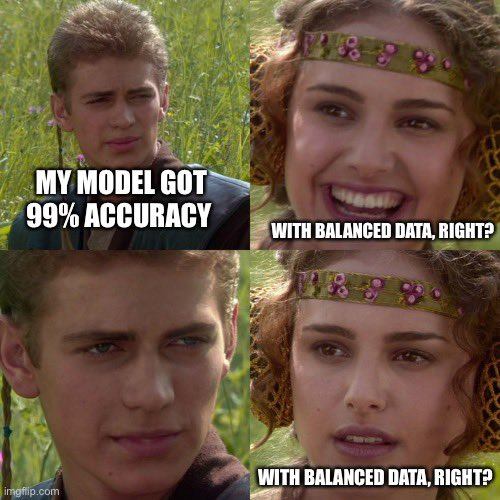

##**6.2: Balancing the Target Variable**
- Recall that within our baseline 2013 dataset, our distribution of heart disease/attack is heavily skewed towards 'No'.
- Let's balance the target variable (heart disease/attack) to create a model that is not biased
- We should expect an improvement in recall as our initial model was trained on a biased dataset towards a 'No' target variable.

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

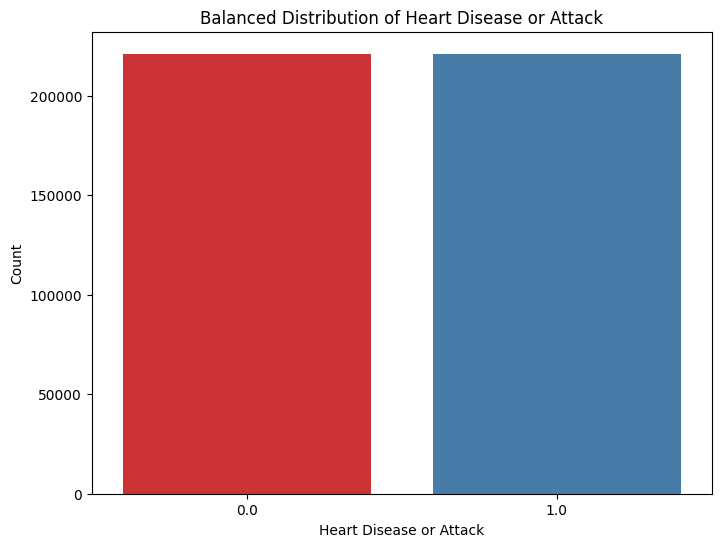

In [ ]:
# Concatenate the resampled X_train_resampled and y_train_resampled back into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['HeartDiseaseorAttack'])], axis=1)

# Plot the distribution of the balanced target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', hue='HeartDiseaseorAttack', data=balanced_df, palette='Set1', legend=False)
plt.title('Balanced Distribution of Heart Disease or Attack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.show()

##**6.3: Rerun Decision Tree Classifier on Balanced Dataset**

In [ ]:
# Create a new Decision Tree Classifier
dt_clf_balanced = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the balanced training data
dt_clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_balanced = dt_clf_balanced.predict(X_test)

# Evaluate the performance of the classifier
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)

# Print the evaluation metrics
print("Metrics for Decision Tree (balanced)")
print("Accuracy:", accuracy_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)
print("F1 Score:", f1_balanced)

Metrics for Decision Tree (balanced)
Accuracy: 0.8497626452774595
Precision: 0.2547848721482162
Recall: 0.2784937238493724
F1 Score: 0.2661122661122662


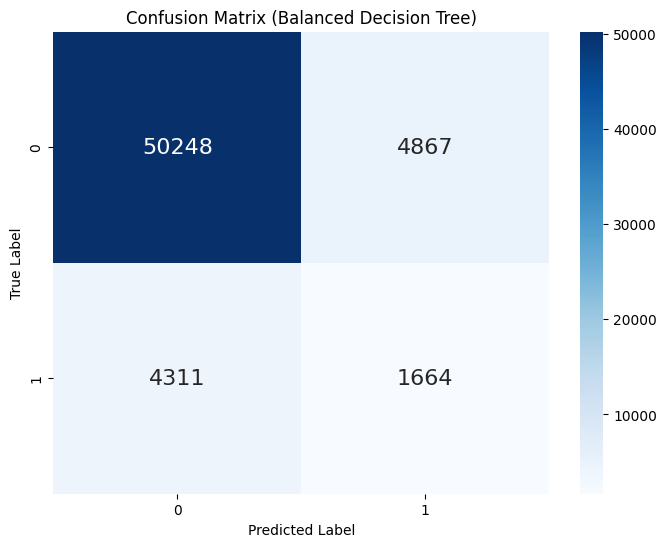

In [ ]:
# Calculate the confusion matrix
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix (Balanced Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **6.3.1: Decision Tree Results (balanced)**
- We see that after balancing our classes, we actually get a slight improvement in all our metrics for our Decision Tree Classifier.
- Our Accuracy is 85.2%
- However, our model still isn't performing optimally as we only have a 28.2% Recall score and an Precision of 24.7%.
- Let's further attempt to increase Recall by taking a look at our features importances and perform dimensionality reduction via PCA.

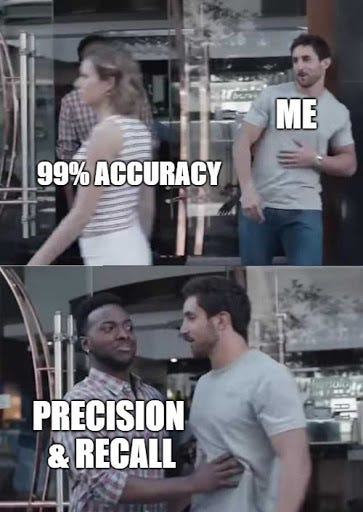


#**7. Feature Importances**
- Feature importances represent the relative contribution of each feature in a machine learning model towards making predictions. In the context of a Decision Tree Classifier, feature importances quantify the extent to which each feature influences the decisions made by the classifier. Higher importances indicate that the corresponding features play a more significant role in the model's decision-making process, while lower importances suggest lesser importance.

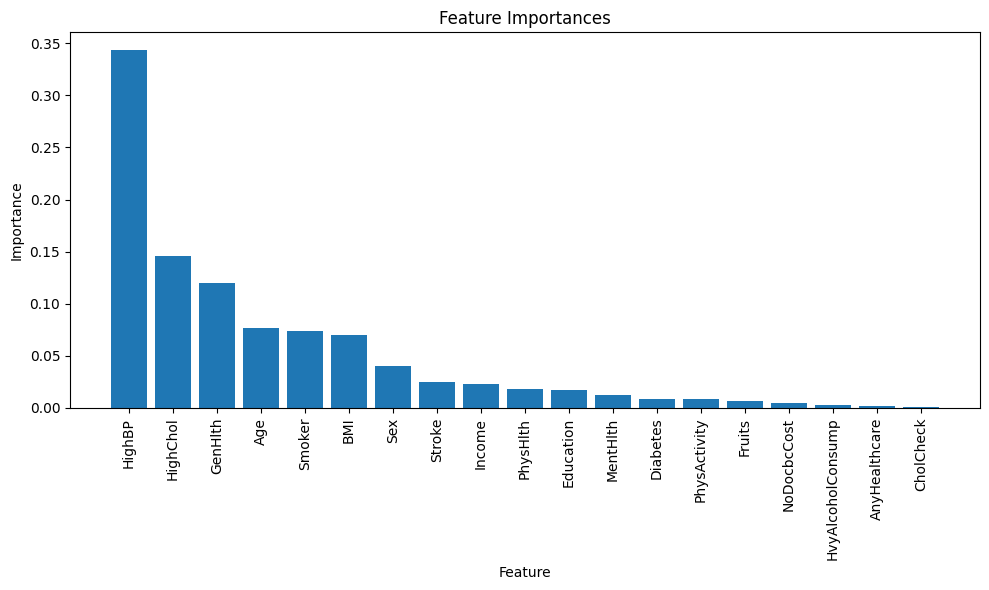

In [ ]:
# Get feature names
feature_names = X_train_resampled.columns

# Fit the classifier on the balanced training data
dt_clf_balanced.fit(X_train_resampled, y_train_resampled)

# Access feature importances of the Decision Tree Classifier
feature_importances = dt_clf_balanced.feature_importances_

# Create a sorted list of feature importances and feature names
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##7.1 **Feature Importance Results from Decision Tree Classififier**
- We see that the most influential features in predicting heart disease/attack appear to be **HighBP, HighChol, and  Genhlth.**
  - In other words, your blood pressure, cholsterol levels, and general health are some of the most significant features in predicting heart disease/attacks.
  - According to the [CDC's High Blood Pressure Symptoms and Causes](https://www.cdc.gov/bloodpressure/about.htm#:~:text=High%20blood%20pressure%20can%20damage%20your%20arteries%20by%20making%20them,Chest%20pain%2C%20also%20called%20angina.): "High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the heart can cause: heart attacks."
  - Also, according to the [CDC about Cholsterol](https://www.cdc.gov/cholesterol/about.htm): "combination of high levels of triglycerides with low HDL cholesterol or high LDL cholesterol levels can increase your risk for heart attack and stroke"
- The least influential features are **CholCheck, AnyHealthcare, and HvyAlcoholConsump**.
  - In other words, getting your cholesterol checked within the lat 5 years, whether or not having any form of health care coverage, and whether or not you are a heavy alcohol consumer doesn't appear to significantly effect predictions on heart disease/attacks.
  - While getting your cholesterol checked **(CholCheck)** may first seem to appear to be an important feature for predicting HD/Attack, the frequency of getting cholesterol checked within the last 5 years may not significantly impact predictions of heart disease/attacks. This could be because cholesterol levels tend to change slowly over time, and a single recent test may not accurately reflect a person's long-term risk of heart disease.
  - Similarly, while **(AnyHealthcare)** having healthcare coverage is essential for accessing preventive care and managing chronic conditions, its direct impact on predicting heart disease/attacks may be limited in certain contexts. This could be because the presence or absence of healthcare coverage alone may not capture the complexity of individual health behaviors and risk factors associated with heart disease

# **8. Principal Component Analysis (PCA)**
-  Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. Its main goal is to transform a dataset with possibly correlated variables into a set of linearly uncorrelated variables called principal components (PC). These PC are ordered in terms of the amount of variance they explain in the original dataset, with the first component capturing the most variance.

- By reducing the dimensionality of the dataset, PCA can help alleviate issues related to the curse of dimensionality, such as overfitting and computational complexity.

- In the context of predicting medical conditions like heart disease/attack, PCA can potentially increase Recall by reducing the noise and redundancy present in the dataset. By focusing on the most informative features, PCA can enhance the model's ability to capture important patterns related to the presence of heart disease/attack, thus improving the recall score.


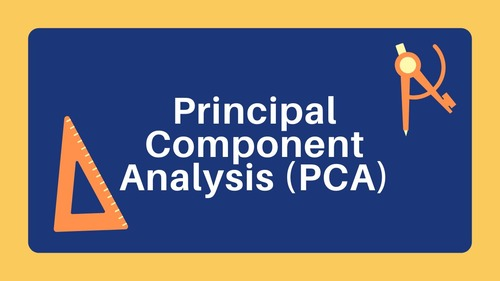

- Since PCA is scale-invariant, we'll need to first scale our data using StandardScaler. This allows PCA to analyze which components account for the majority of the variance in the data.


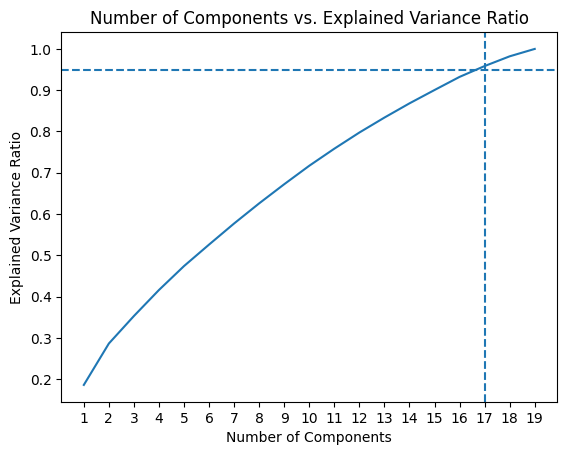

In [ ]:
# Find the appropriate number of principal components to keep for pca

# Scale data since PCA is scale-invariant
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_resampled)
X_test_scaled = sc.transform(X_test)

# Use PCA to tranform train and validation sets
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

# Plot cumulative explained variance ratios
plt.plot([i for i in range(1, len(cum_evr) + 1)], cum_evr)
plt.axhline(y = 0.95, linestyle = 'dashed')
plt.axvline(x = 17, linestyle = 'dashed')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Number of Components vs. Explained Variance Ratio")
plt.xticks([i for i in range (1,20)])
plt.show()

## **8.1: PCA Dimensionality Reduction Conclusions:**
- We ordered the components in decreasing order by their contribution to the variance in the data, and then plotted these components, such that tick 1 on the plot above represents the component which contributes the most to the variance within the data.

- A typical theshold of explained variance for reducing the number of components is 95%. As such, we choose to keep the number of components that contribute ~95% of the variance in the data. Based on the plot above, that means we keep 17 total components. This should reduce the complexity/redundancy of the dataset, reducing the training time for future models and helping to prevent overfitting on the data.

# **9. Retraining Our Decision Tree Classifier Post-Dimensionality Reduction**
- Now that we know how many components we should keep when performing PCA on our dataset, we'll transform the dataset by reducing the dimensionality to 17 total components.


In [ ]:
# Create PCA object with 17 components and transform training/testing data
# Use PCA to tranform train and validation sets
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

- We will now re-train our Decision Tree Classifier with the reduced dataset to observe the affect that PCA has on the model's performance.

In [ ]:
# Create a new Decision Tree Classifier
dt_clf_balanced_pca = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the balanced, reduced training data
dt_clf_balanced_pca.fit(X_train_pca, y_train_resampled)

# Predict on the test set
y_pred_balanced_pca = dt_clf_balanced_pca.predict(X_test_pca)

# Evaluate the performance of the classifier
accuracy_balanced_pca = accuracy_score(y_test, y_pred_balanced_pca)
precision_balanced_pca = precision_score(y_test, y_pred_balanced_pca)
recall_balanced_pca = recall_score(y_test, y_pred_balanced_pca)
f1_balanced_pca = f1_score(y_test, y_pred_balanced_pca)

# Print the evaluation metrics
print("Metrics for Decision Tree (balanced) with PCA")
print("Accuracy:", accuracy_balanced_pca)
print("Precision:", precision_balanced_pca)
print("Recall:", recall_balanced_pca)
print("F1 Score:", f1_balanced_pca)

Metrics for Decision Tree (balanced) with PCA
Accuracy: 0.7989032574889507
Precision: 0.21673550008978273
Recall: 0.4040167364016736
F1 Score: 0.28212470052007244


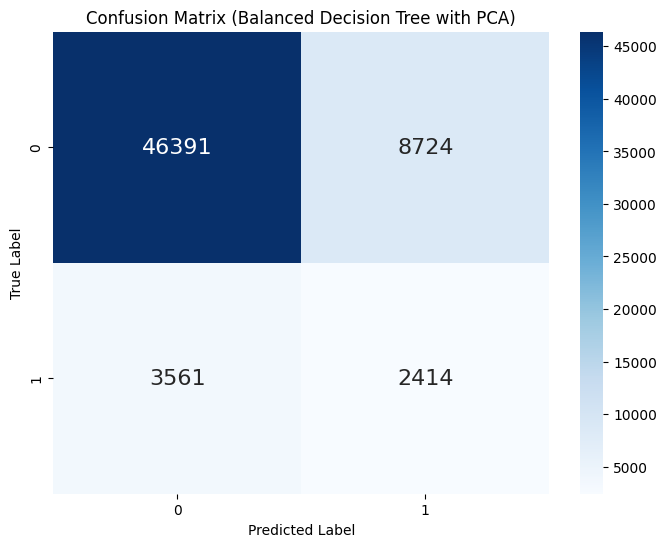

In [ ]:
# Calculate the confusion matrix
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced_pca)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix (Balanced Decision Tree with PCA)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **9.1: Effects of PCA**
- Decrease of Accuracy from 85.2% -> 79.9%
- Decrease of Precision 24.7% -> 21.7%
- Increase of Recall from 28.2% -> 40.4%
- Increase F1 Score from 26.4% -> 28.2%
- The significant improvement in recall from 28.2% to 40.4% following the implementation of PCA suggests that the model is now better at capturing instances of heart disease/attack, reducing the likelihood of false negatives. While there was a slight decrease in accuracy and precision, these tradeoffs are justifiable given the critical importance of recall in medical prediction tasks.
- Therefore, considering the nature of the medical prediction task and the significant enhancement in recall achieved with PCA, we will continue using PCA in the modeling pipeline. This approach prioritizes the model's ability to accurately detect instances of heart disease/attack, ultimately improving patient outcomes and healthcare decision-making.

## **9.2: Adjusting Max Tree Depth**
- So far, we have not specified a maximum depth for our decision tree classifier. In general, the deeper a decision tree, the more complex the model. When our model is extremely complex, we will often overfit the training data. This may result in lower performance when we evaluate our model against the test data.

- Here, we will attempt to tune the max_depth hyperparameter for our decision tree classifier to reduce overfitting. Since we didn't previously specify a max depth, this should theoretically improve our performance.

- To accomplish this hyperparameter tuning, we will train a series of models with incremental values for max_depth, then analyze the performance of each. As stated previously, we are currently optimizing for improved recall, given the diagnostic nature of the tool.

In [ ]:
#Train a series of dt's to find ideal maximum tree depth

# Define lists to hold the results from each training/testing iteration
accuracies = []
precisions = []
recalls = []
f1_scores = []

# We'll train models with increasing max_depth values from 1-12, inclusive
for i in range(1, 13):

  # Create a new dt classifier
  dt_clf_balanced_pca_depth_test = DecisionTreeClassifier(random_state=42, max_depth=i)

  # Fit the classifier on the balanced, reduced training data
  dt_clf_balanced_pca_depth_test.fit(X_train_pca, y_train_resampled)

  # Predict on the reduced test set
  y_pred_balanced_pca_depth_test = dt_clf_balanced_pca_depth_test.predict(X_test_pca)

  # Evaluate the performance of the classifier
  accuracy_balanced_pca_depth_test = accuracy_score(y_test, y_pred_balanced_pca_depth_test)
  accuracies.append(accuracy_balanced_pca_depth_test)

  precision_balanced_pca_depth_test = precision_score(y_test, y_pred_balanced_pca_depth_test)
  precisions.append(precision_balanced_pca_depth_test)

  recall_balanced_pca_depth_test = recall_score(y_test, y_pred_balanced_pca_depth_test)
  recalls.append(recall_balanced_pca_depth_test)

  f1_balanced_pca_depth_test = f1_score(y_test, y_pred_balanced_pca_depth_test)
  f1_scores.append(f1_balanced_pca_depth_test)

#Display the evaluation metrics for each max_depth
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
results = []
results.append(accuracies)
results.append(precisions)
results.append(recalls)
results.append(f1_scores)


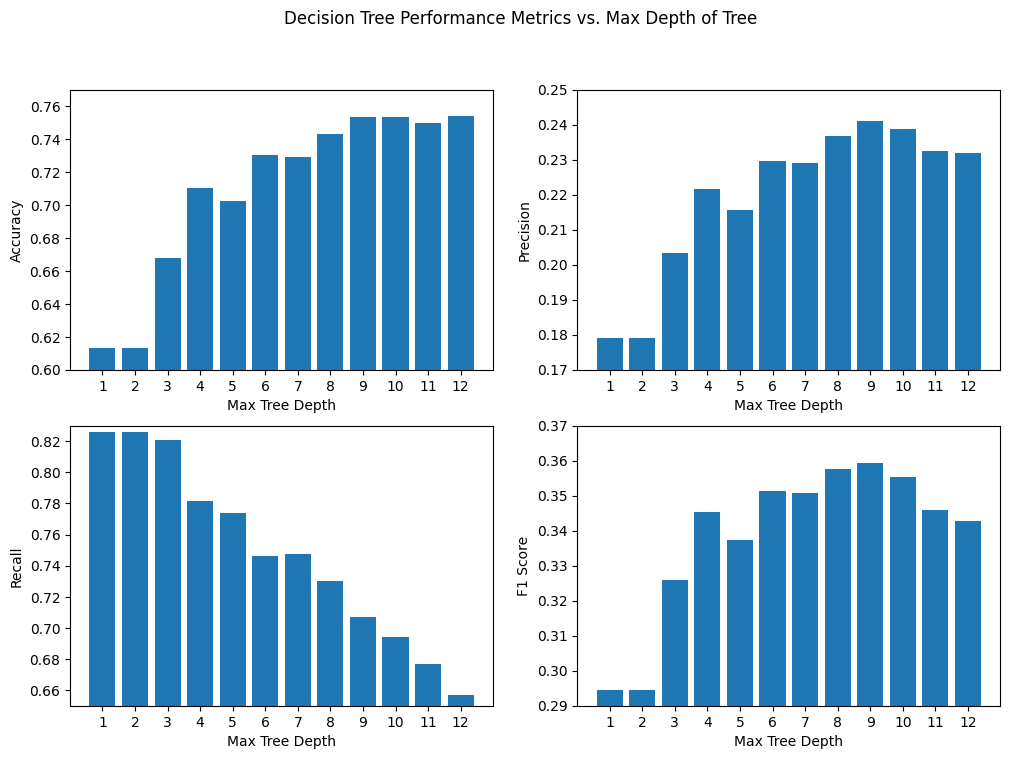

In [ ]:
# Plot the performance metrics for the various classifiers
plt.figure(figsize=(12, 8))
plt.suptitle("Decision Tree Performance Metrics vs. Max Depth of Tree")
for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    plt.bar(range(len(results[0])), results[i-1], tick_label=[i for i in range(1, 13)])
    if metric == "Accuracy":
      plt.ylim(0.6, 0.77)
    elif metric == "Recall":
      plt.ylim(0.65, 0.83)
    elif metric == "Precision":
      plt.ylim(0.17, 0.25)
    else:
      plt.ylim(0.29, 0.37)
    plt.xlabel("Max Tree Depth")
    plt.ylabel(metric)

### **9.2.1: Max Depth Analysis Conclusions**

- Let's look at the general performance trends that arise as we gradually increase the maximum depth (and therefore complexity) of our model.

- Accuracy: The accuracy is worst for models with max_depth < 3, and continues to increase before leveling off around max_depth value 9. For an accurate model, we'd likely want to select a max_depth value between 4 and 12, which would give us an accuracy somewhere in the range of 69-76%.
- Precision: Similar to accuracy, the precision is worst at low max_depth values and quickly increases. Note that the values for precision do not vary as much, with the lowest score being 18% and the highest being 24%. This difference is still meaningful, but not as drastic as the fluctuations observed in accuracy. For optimal precision, we'd once again prefer a max_depth value between 4 and 12, which would give us a precision between 21-24%.
- Recall: Recall scores begin quite high and sharply drop off as the max_depth increases. This behavior makes sense, because as the depth of the tree increases, the model is more likely to overfit the training data and therefore the classifier will be worse at predicting positive cases of heart disease or attack in the test data. For an optimal recall score, we'll want to select a value of max_depth between 1 and 5, which display recall scores between 77-82%. Beyond 5, the recall drops too sharply for the model to be of any practical use.
- F1 Score: Finally, the F1 Score's behavior closely mimics that of the observed changes in precision. There is less variation in the F1 Score values than we see in recall or accuracy, and the scores increase before leveling off around 6. If we're looking prioritizing F1 score, we'll likely want to pick a value for max_depth between 4 and 12 (Note the biggest difference in F1 scores in this range is only 0.02).

# **10. Re-training our Decision Tree Classifier - One Last Time**
Based on the above analysis, we will re-train our model using a **max_depth value of 4**. We choose 4 as the max depth because although we sacrifice some degree of recall (~4%) by not choosing a smaller value, we also make performance gains in other areas as a tradeoff. For example, by choosing a max depth value of 4 instead of 3, we gain ~4% in accuracy, ~2% in precision, and ~2% in F1 score. This tradeoff seems to improve the overall performance of our model, while also making significant improvements to recall compared to our model with no maximum tree depth (40% recall vs. 78% recall).

In [ ]:
# Create a new Decision Tree Classifier with max_depth=4
dt_clf_balanced_pca_depth = DecisionTreeClassifier(random_state=42, max_depth=4)

# Fit the classifier on the balanced, reduced training data
dt_clf_balanced_pca_depth.fit(X_train_pca, y_train_resampled)

# Predict on the test set
y_pred_balanced_pca_depth = dt_clf_balanced_pca_depth.predict(X_test_pca)

# Evaluate the performance of the classifier
accuracy_balanced_pca_depth = accuracy_score(y_test, y_pred_balanced_pca_depth)
precision_balanced_pca_depth = precision_score(y_test, y_pred_balanced_pca_depth)
recall_balanced_pca_depth = recall_score(y_test, y_pred_balanced_pca_depth)
f1_balanced_pca_depth = f1_score(y_test, y_pred_balanced_pca_depth)

# Print the evaluation metrics
print("Metrics for Decision Tree (balanced) with PCA")
print("Accuracy:", accuracy_balanced_pca_depth)
print("Precision:", precision_balanced_pca_depth)
print("Recall:", recall_balanced_pca_depth)
print("F1 Score:", f1_balanced_pca_depth)

Metrics for Decision Tree (balanced) with PCA
Accuracy: 0.71005074480275
Precision: 0.22155802258278773
Recall: 0.7815899581589958
F1 Score: 0.3452482164639781


## **10.1 Max Depth Results**
Now that we've applied tuned our model's max depth hyperparameter with our chosen value of 4, let's analyze the effects this change has on our model's performance. Those changes to our performance metrics are listed below.

- Accuracy: 79.9% --> 71.0%
- Precision: 21.7% --> 22.2%
- Recall: 40.4% --> 78.2%
- F1 Score: 28.2% --> 34.5%

- The most obvious change is the massive performance gain in recall. We achieve a nearly 40% increase in our recall score, which is a huge improvement, given the diagnostic nature of our tool. Our model is now undeniably better at identifying positive cases of Heart Disease or Attack in the test data.

- However, we also experience a decrease in the model's accuracy score. We argue that a 9% decrease in our accuracy score is a worthwhile tradeoff. Given that we experience such a large increase in Recall, this decrease in accuracy implies that our model results in more False Positive predictions. Since we're predicting disease, we'd much rather have a higher rate of false positives than false negatives, so this is an acceptable tradeoff.

#**11. Random Forest Classifier**
- A Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

- Random Forests differ from a single decision tree in that they create multiple decision trees based on different random subsets of the training data and random subsets of the features. This randomness helps to reduce overfitting and improve the generalization performance of the model.

- A transition from Decision Trees to Random Forests may lead to a potential increase in our evaluation metrics. For each tree in the forest, we will maintain our previous PCA-reduced training and testing data and the hyperparameter values we achieved previously.

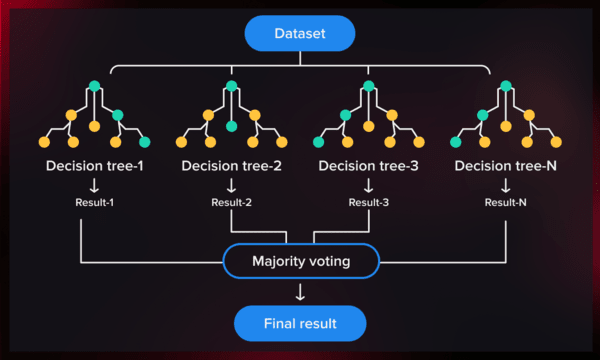

In [ ]:
# Create a RandomForestClassifier with hyperparameter max_depth=4
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)

# Fit the classifier on the balanced, reduced training data
rf_clf.fit(X_train_pca, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_pca)

# Evaluate the performance of the RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
# Print the random forest evaluation metrics
print("Metrics for Random Forest (balanced) with PCA and max_depth=4")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Metrics for Random Forest (balanced) with PCA and max_depth=4
Accuracy: 0.7020461614012113
Precision: 0.21998809142124306
Recall: 0.8038493723849373
F1 Score: 0.3454401611047181


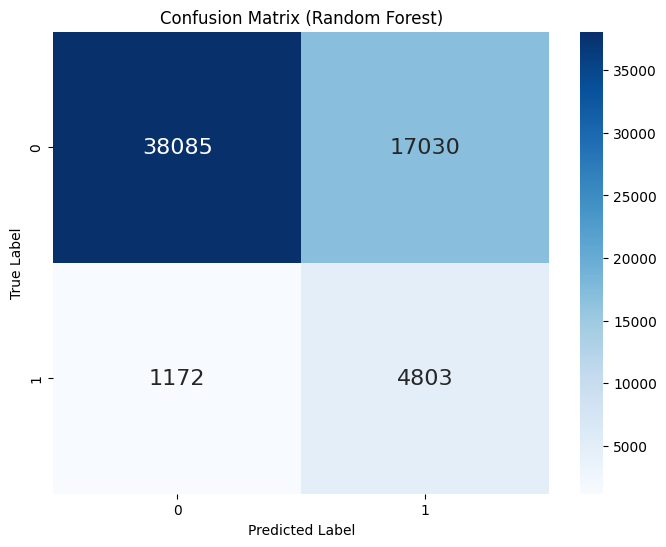

In [ ]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **11.1: Random Forest Results**
Below are the performance metric changes we observed between the single Decision Tree classifier and the Random Forest.
- Accuracy: 71.0% --> 70.2%
- Precision: 22.2% --> 22.0%
- Recall: 78.2% --> 80.4%
- F1 Score: 34.6% --> 34.5%

- The improvement in recall observed when transitioning from a Decision Tree Classifier with PCA to a Random Forest Classifier with PCA is indicative of the enhanced capabilities and robustness offered by the Random Forest algorithm.
- The increase in recall when using Random Forests can be attributed to several factors. Firstly, the ensemble approach of Random Forests helps mitigate the risk of overfitting present in individual decision trees, resulting in more reliable and consistent predictions. Additionally, the Random Forest algorithm naturally handles high-dimensional data by selecting random subsets of features for each tree, which can lead to improved model performance.
- We do notice very slight reductions in the other three performance metrics (Accuracy, Precision, and F1 Score), but these score decreases are all < 1%. Since our primary metric of interest is recall, we believe this is a worthwhile tradeoff given that we see a 2% increase in recall with the random forest.




## **11.2: Learning Curve for Random Forest Classifier**
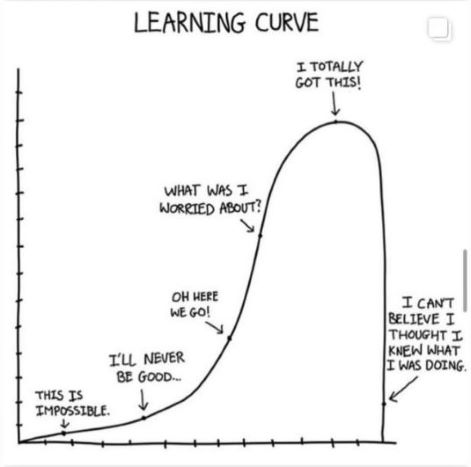

- While our Random Forest model above seems to perform reasonably well against the test data, our main concern is that the model have have overfit the training set, which can negatively impact future predictions.

- When we train classifiers, one of the hyperparameters we might want to tune is the size of the training data itself. If the training data does not contain enough samples, we might underfit our data and obtain a model with poor predicitive capabilities. On the other hand, if the training data contains too many samples, we may risk overfitting the data.

- To find the optimal number of training samples for our model, we can calculate the model's learning curve. The learning curve is a helpful way to visualize the model's performance against the training and test data as the training size varies.

- Typically, we want to isolate a point at which the test performance displays diminishing returns. In other words, we want to limit the size of the training data such that the model achieves most of its performance gains on the test data. At the point where performance improvements begin to level off, we may consider trimming the training data size to prevent overfitting.

- Below, we visualize this learning curve for our Random Forest model.

In [ ]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_clf, X=X_train_pca,
                                                        y=y_train_resampled, cv=2)

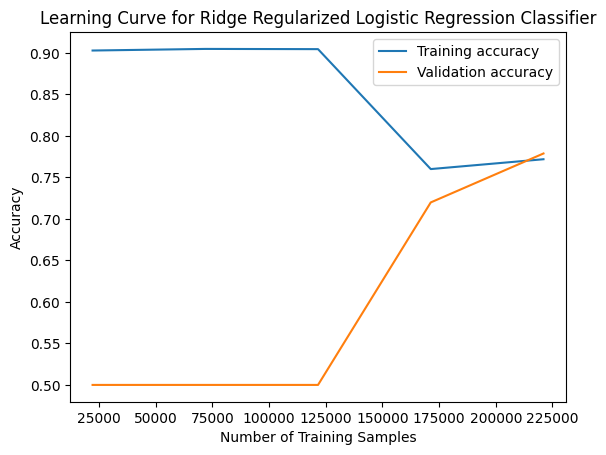

In [ ]:
# Visualize learning curve
train = [train_scores[i][1] for i in range(len(train_scores))]
test = [test_scores[i][1] for i in range(len(test_scores))]
plt.plot(train_sizes, train, label="Training accuracy")
plt.plot(train_sizes, test, label="Validation accuracy")
plt.title("Learning Curve for Ridge Regularized Logistic Regression Classifier")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Learning Curve Conclusions**
- Based on the graph above, we can see how our model's performance against the training and test data varies as we vary the size of the training data.

- Before ~125,000 samples, our model performs quite well against the training data, but performs quite poorly against the test data. The model then experiences a sharp increase in performance as the training data increases, up until we hit a point somewhere between 150,000 - 175,000 samples.

- After this point, we can see that the model's performance gains on the test set begin to taper off. If we continue to increase the size of the training data past this point, we may run the risk of overfitting our model. As such, we will choose to limit the size of the training data to a maximum of **175,000 samples.**

###**11.2.1 Accounting for the Learning Curve**
- Based on the output from the learning curve, we'll re-sample our test and training data by specifically allocating 175,000 samples to be included in our training set. We'll also need to rebalance the training data based on our HeartDiseaseOrAttack target variable after we downsample the data. Recall that this is necessary because our original data is quite unbalanced with respect to HeartDiseaseOrAttack.

- We will then re-train our Random Forest classifier with this downsampled training data and analyze any affects on performance.

In [ ]:
# Split training & testing data, with 175k training samples
X_train, X_test, y_train, y_test_downsampled = train_test_split(X, y, train_size=175000, random_state=42)

# Instantiate SMOTE to balance HeartDiseaseOrAttack target variable across data
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled_bal, y_train_resampled_bal = smote.fit_resample(X_train, y_train)

# fit PCA on balanced dataset
pca = PCA(n_components=17)
X_train_downsampled = pca.fit_transform(X_train_resampled_bal)
X_test_downsampled = pca.transform(X_test)

In [ ]:
# Create a RandomForestClassifier with hyperparameter max_depth=4
rf_clf_lc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)

# Fit the classifier on the balanced, reduced training data
rf_clf_lc.fit(X_train_downsampled, y_train_resampled_bal)

# Predict on the test set
y_pred_rf = rf_clf_lc.predict(X_test_downsampled)

# Evaluate the performance of the RandomForestClassifier
accuracy_rf = accuracy_score(y_test_downsampled, y_pred_rf)
precision_rf = precision_score(y_test_downsampled, y_pred_rf)
recall_rf = recall_score(y_test_downsampled, y_pred_rf)
f1_rf = f1_score(y_test_downsampled, y_pred_rf)

# Print the random forest evaluation metrics
print("Metrics for Random Forest (balanced) with PCA and max_depth=4")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Metrics for Random Forest (balanced) with PCA and max_depth=4
Accuracy: 0.702006147996535
Precision: 0.21627861813003044
Recall: 0.7969942748091603
F1 Score: 0.3402298070232014


### **11.2.2 Results**

Now that we've retrained our model on the downsampled (175k entries) training data, we obtain the following performance adjustments when evaluated against the test set:

- Accuracy: 70.2% --> 70.2%
- Precision: 22.0% --> 21.6%
- Recall: 80.4% --> 79.7%
- F1 Score: 34.5% --> 34.0%

- We don't see any performance gains to our model after we downsampled the training data, and some of our metric are negatively impacted by about half a percentage point.

- All in all, our model performs similarly after being trained on the downsampled data, and our performance metrics are largely unaffected. This signifies that any benefit of training on the larger dataset was indeed miniscule, because we maintained virtually the same performance with many less training samples. We may have also prevented the model from overfitting by reducing the size of the training set.

- In addition, we now have the added benefit that our model will be faster to train, since there are many less samples in the downsampled training set. This is another aspect of performance that we have not yet discussed, but training time is a worthwhile metric to take into account when examining the resources needed to train our models. If we're able to maintain our previous performance metrics while simultaneously reducing training time, then we'll happily do so.

Now that we've tuned our Random Forest classifier, let's explore one more classification algorithm, Logistic Regression, to potentially create a more robust machine learning model.

# **12. Logistic Regression**
- Logistic Regression is a statistical method used for binary classification tasks, where the goal is to predict the probability of an instance belonging to a particular class. It models the relationship between the features and the target variable (Heart Disease/Attack) using the logistic function, which maps the input features to probabilities between 0 and 1.
- Transitioning from Random Forest to Logistic Regression can be advantageous for several reasons:
  - Interpretability: Logistic Regression provides interpretable coefficients that represent the impact of each feature on the log-odds of the target variable. This allows for a clear understanding of how individual features influence the model's predictions, making it easier to interpret and communicate results
  - Model Complexity: Logistic Regression is a simpler model compared to Random Forests, with fewer hyperparameters to tune. This simplicity reduces the risk of overfitting, especially in scenarios with limited data or when dealing with high-dimensional feature spaces.
  - Performance on Imbalanced Data: Logistic Regression can perform well even with imbalanced datasets, provided that appropriate regularization techniques are applied. Its loss function penalizes misclassifications proportionally to the predicted probabilities, making it less sensitive to class imbalance compared to ensemble methods like Random Forests.






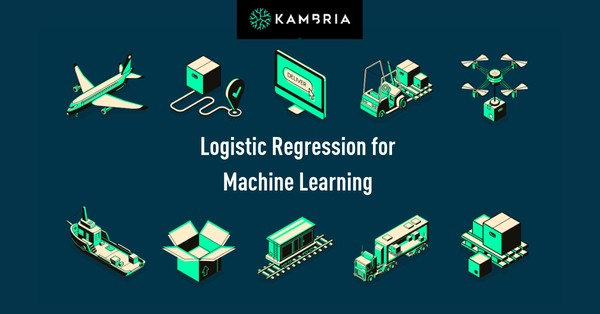

Metrics for Logistic Regression Classifier (balanced with PCA)
Accuracy: 0.7588967097724668
Precision: 0.2520956048935206
Recall: 0.7449372384937238
F1 Score: 0.37670856078879444


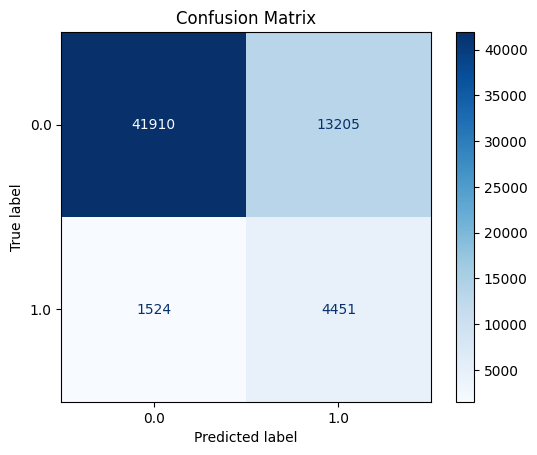

In [ ]:
# Create a new Logistic Regression Classifier
lr_clf = LogisticRegression(max_iter=10000)

# Fit the classifier to the PCA-reduced dataset
lr_clf.fit(X_train_pca, y_train_resampled)

# Use the classifier to predict the classes for the test data
y_pred_lr_clf = lr_clf.predict(X_test_pca)

# Evaluate the performance of the classifier
accuracy_lr_clf = accuracy_score(y_test, y_pred_lr_clf)
precision_lr_clf = precision_score(y_test, y_pred_lr_clf)
recall_lr_clf = recall_score(y_test, y_pred_lr_clf)
f1_lr_clf = f1_score(y_test, y_pred_lr_clf)

# Print the evaluation metrics
print("Metrics for Logistic Regression Classifier (balanced with PCA)")
print("Accuracy:", accuracy_lr_clf)
print("Precision:", precision_lr_clf)
print("Recall:", recall_lr_clf)
print("F1 Score:", f1_lr_clf)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lr_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Size of X_test_pca (number of rows)
num_rows_X_test_pca = X_test_pca.shape[0]
print("Number of rows in X_test_pca:", num_rows_X_test_pca)

# Size of X_train_pca (number of rows)
num_rows_X_train_pca = X_train_pca.shape[0]
print("Number of rows in X_train_pca:", num_rows_X_train_pca)

# Size of y_test (number of rows)
num_rows_y_test = y_test.shape[0]
print("Number of rows in y_test:", num_rows_y_test)

# Size of y_train_resampled (number of rows)
num_rows_y_train_resampled = y_train_resampled.shape[0]
print("Number of rows in y_train_resampled:", num_rows_y_train_resampled)

## **12.1: Logistic Regression Results**
- In our transition from Random Forest to Logistic Regression we see a decrease in Recall (5.9% decrease) compared to our Random Forest model, but an improvement in Accuracy (5.6% increase), Precision (3.2% increase), and F1 Score (3.1% increase).

- Given the unfavorable tradeoff between accuracy and recall, the Logistic Regression classification model is currently not a preferable choice for medical prediction tasks like detecting heart disease/attack. To improve our Logistic Regression model, we will attempt to tune some hyperparameters in the following sections.

## **12.2: L2 (Ridge) Regularization**

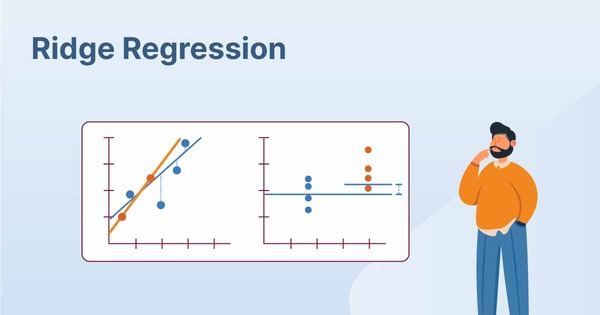


- L2 Ridge Regression is a regularization technique used in regression analysis, including logistic regression, to prevent overfitting and improve the generalization performance of the model.
- The regularization term penalizes large coefficient values, effectively shrinking them towards zero. By constraining the magnitude of the coefficients, Ridge Regression reduces the model's complexity and makes it less sensitive to noise in the data, which means we should expect an improvement in our evaluation metrics

Metrics for Logistic Regression Classifier (balanced) with regularization (L2)
Accuracy: 0.758569323948273
Precision: 0.25175418741511996
Recall: 0.744602510460251
F1 Score: 0.3762845181206918


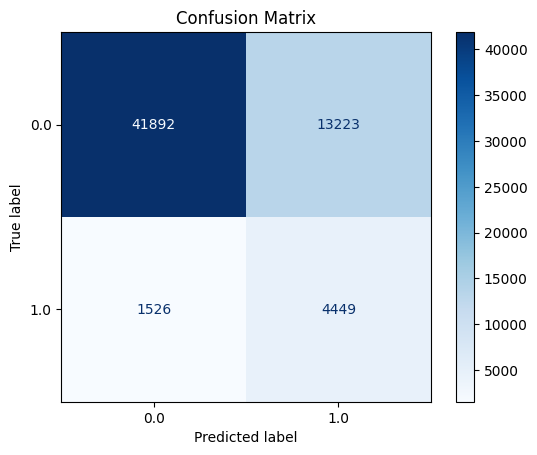

In [ ]:
# Define logistic regression with regularization
clf_l2lr = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=10000)

# Fit the pipeline on the balanced, reduced training data
clf_l2lr.fit(X_train_pca, y_train_resampled)

# Predict on the test set
y_pred_clf_l2lr = clf_l2lr.predict(X_test_pca)

# Evaluate the performance of the classifier
accuracy_balanced_reg = accuracy_score(y_test, y_pred_clf_l2lr)
precision_balanced_reg = precision_score(y_test, y_pred_clf_l2lr)
recall_balanced_reg = recall_score(y_test, y_pred_clf_l2lr)
f1_balanced_reg = f1_score(y_test, y_pred_clf_l2lr)

# Print the evaluation metrics
print("Metrics for Logistic Regression Classifier (balanced) with regularization (L2)")
print("Accuracy:", accuracy_balanced_reg)
print("Precision:", precision_balanced_reg)
print("Recall:", recall_balanced_reg)
print("F1 Score:", f1_balanced_reg)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_clf_l2lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_l2lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **12.2.1: L2 (Ridge) Regularization Conclusions**
- Applying L2 Regularization to Logistic Regressions our model does not appear to have an effect on our model's performance as it's evalaution metrics all remain relatively the same.
- A reason for this may be because original logistic regression model may have already been well-regularized, with an optimal level of complexity that effectively balances bias and variance.
- Another reason for having no change in our model's performance may be due to PCA.
- If PCA has already effectively reduced overfitting by capturing the most significant patterns in the data and reducing the feature space to its essential components, additional regularization techniques such as L2 regularization may have little to no effect since the primary goal of regularization is to prevent overfitting by constraining the complexity of the model.

### **12.2.2 Learning Curve for L2 Ridge Regularized Logistic Regression Model**
- Similar to what we did for our Random Forest model, we will once again calculate and visualize the learning curve for our L2 Ridge Regularized Logistic Regression classifier.

- In evaluating the learning curve for our model, the primary goal is to prevent overfitting, with a positive side effect being the reduction of the necessary training time for the model.

- We'll calculate and visualize the learning curve below.

In [ ]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(clf_l2lr, X=X_train_pca,
                                                        y=y_train_resampled, cv=2)

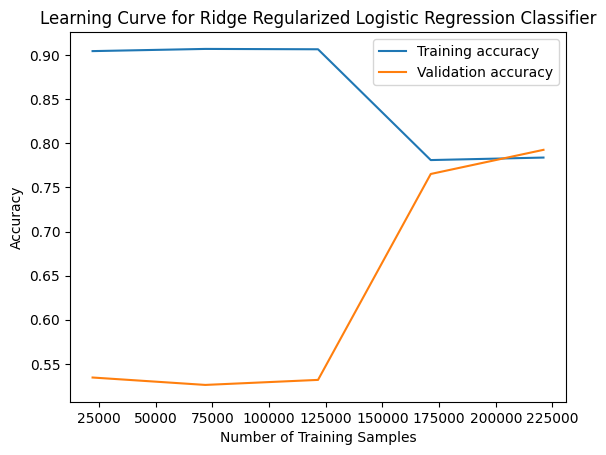

In [ ]:
# Visualize learning curve
train = [train_scores[i][1] for i in range(len(train_scores))]
test = [test_scores[i][1] for i in range(len(test_scores))]
plt.plot(train_sizes, train, label="Training accuracy")
plt.plot(train_sizes, test, label="Validation accuracy")
plt.title("Learning Curve for Ridge Regularized Logistic Regression Classifier")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Learning Curve Conclusions**
- Based on the graph above, we can see how our model's performance against the training and test data varies as we vary the size of the training data.

- Perhaps surprisingly, the learning curve here appears very similar to the learning curve for our Random Forest classifier. For the same reasons listed in our Random Forest learning curve analysis, we will choose to limit the size of the training data to a maximum of 175,000 samples.



###**12.2.3 Accounting for the Learning Curve**
- Fortunately for us, we already have a balanced, downsampled training set with 175,000 samples and PCA applied, which we created after completing the learning curve analysis for our Random Forest model. We'll reuse that same dataset for training our Ridge Regression model below.

- As we re-train on the downsampled training set, we hope to maintain our previous performance metrics while simultaneously preventing overfitting.

Metrics for Logistic Regression Classifier (balanced)
Accuracy: 0.7604657758970939
Precision: 0.2516295527709048
Recall: 0.7520674300254453
F1 Score: 0.3770906843689571


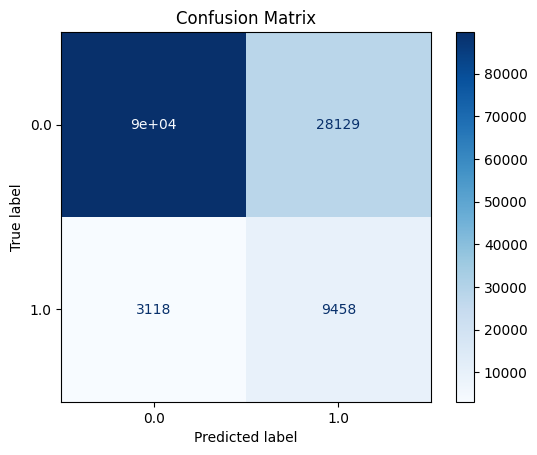

In [ ]:
#retrain model with 175k training samples to reduce training time and prevent overfitting

# Create new logistic regression classifier
clf_lr_lc = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=10000)

clf_lr_lc.fit(X_train_downsampled, y_train_resampled_bal)

y_pred_lr_lc = clf_lr_lc.predict(X_test_downsampled)

# Evaluate the performance of the classifier
accuracy_lr_lc = accuracy_score(y_test_downsampled, y_pred_lr_lc)
precision_lr_lc = precision_score(y_test_downsampled, y_pred_lr_lc)
recall_lr_lc = recall_score(y_test_downsampled, y_pred_lr_lc)
f1_lr_lc = f1_score(y_test_downsampled, y_pred_lr_lc)

# Print the evaluation metrics
print("Metrics for Logistic Regression Classifier (balanced)")
print("Accuracy:", accuracy_lr_lc)
print("Precision:", precision_lr_lc)
print("Recall:", recall_lr_lc)
print("F1 Score:", f1_lr_lc)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test_downsampled, y_pred_lr_lc)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_lr_lc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **12.3.4 Results**

Now that we've retrained our model on the downsampled (175k entries) training data, we obtain the following performance adjustments when evaluated against the test set:

- Accuracy: 75.9% --> 75.84%
- Precision: 25.2% --> 24.95%
- Recall: 74.5% --> 75.02%
- F1 Score: 37.6% --> 37.45%

- Our model's performance seems largely unaffected after we downsampled the training data. This can be seen as a postive sign, since we want to prevent overfitting here, and we're not necessarily looking for huge performance gains against the test set. Rather, our goal is to proactively prevent overfitting and therefore reduce issues that might arise when making predictions against future datasets.

- As before, we now have the added benefit that our model will be faster to train, since there are many less samples in the downsampled training set.

# **13. Choosing an Optimal Model**
Let's compare our two best performing models so far:

###Random Forest
- Accuracy: 70.2%
- Precision: 21.6%
- Recall: 79.7%
- F1 Score: 34.0%

###Logistic Regression
- Accuracy: 75.8%
- Precision: 25.0%
- Recall: 75.0%
- F1 Score: 37.5%

### Random Forest > Logistic Regression
- In the context of predicting heart disease/attacks, maximizing recall is often prioritized over other performance metrics such as accuracy, precision, and F1 score. This is because the consequences of failing to identify a true positive (a missed diagnosis of heart disease) can be more severe than the consequences of incorrectly classifying a negative instance (a false alarm).
- Given that Random Forest exhibits a higher recall compared to Logistic Regression, it suggests that Random Forest is better at identifying individuals with heart disease correctly, reducing the likelihood of false negatives (missed diagnoses). This is crucial in healthcare scenarios where early detection and intervention can significantly impact patient outcomes.
- Therefore, despite having slightly lower metrics for accuracy, precision, and F1 score, the higher recall of the Random Forest model makes it a preferred choice for predicting heart disease/attacks. Its ability to correctly identify more cases of heart disease outweighs the potential drawbacks of lower precision or increased false positives, aligning better with the goal of early and accurate detection in medical settings.

#**14. Retrospective and Prospective Analysis**

Now that we have found the optimal model (i.e., random forest) for predicting heart disease using 20 features based around the BRFSS 2013 data set, we would like to test the performance of this model on other years within a 2-year margin, namely 2011 and 2015. This sort of analysis could further inform whether models based around certain years are accurate enough to be used in the near future.
- We will also evaluate the Logistic Regression model's performance on past and future unseen data as a comparison against Random Forest.

##**14.1: Applying Random Forest Classifier to 2011 Dataset**


Metrics for Random Forest Classifier on Retrospective 2011 Dataset
Accuracy: 0.7118581678212057
Precision: 0.21865461754806584
Recall: 0.796185615472433
F1 Score: 0.3430878193117119


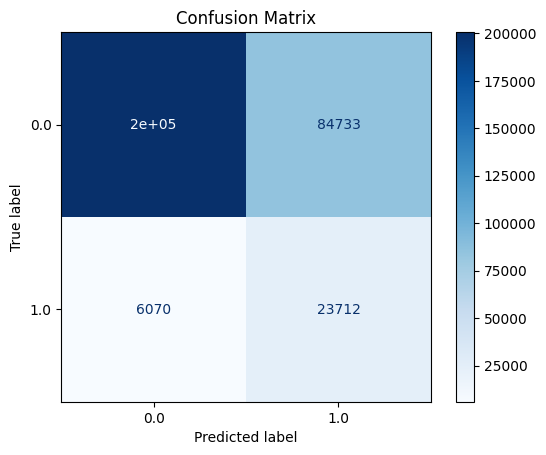

In [ ]:
# test model on 2011 dataset
# Create 2011 dataset without DiffWalk or Veggies Features
modified_heart_df_2011 = brfss_2011_df_selected.copy()

X = modified_heart_df_2011.drop('HeartDiseaseorAttack', axis=1)
y = modified_heart_df_2011['HeartDiseaseorAttack']

X = pca.transform(X)

# Using random forest model
y_pred = rf_clf_lc.predict(X)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print("Metrics for Random Forest Classifier on Retrospective 2011 Dataset")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **14.1.1: Results**
Below are the performance metric changes we observed between the Random Forest based on the 2013 dataset and that model performance on the 2011 dataset.

Accuracy: 70.2% --> 71.2%

Precision: 22.0% --> 21.9%

Recall: 80.4% --> 79.6%

F1 Score: 34.5% --> 34.3%

- Precision, Recall, and F1 Score all decreased very slightly (< 1%), while Accuracy increased very slightly (< 1% as well).
- Overall, it is promising to see all four metrics change very slightly after applying the 2011 dataset to the 2013-trained model.
- As such, we can tentatively hypothesize that using a model from two years in the future is a relatively predictor of the past.


## **14.2: Applying Logistic Regression to 2011 Dataset**

Metrics for LogReg Classifier on Retrospective 2011 Dataset
Accuracy: 0.7696432934665681
Precision: 0.2545268976273208
Recall: 0.7452488080048352
F1 Score: 0.37945684415684333


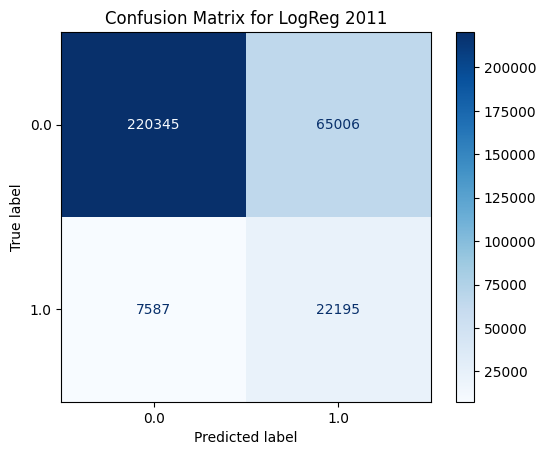

In [ ]:
# Using logistic regression model
y_pred = clf_lr_lc.predict(X)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print("Metrics for LogReg Classifier on Retrospective 2011 Dataset")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for LogReg 2011")
plt.show()

### **14.2.1: Results**
- The metrics for the 2013 trained logistic regression model appears successfully generalize to past unseen data, since all evaluation metrics are around the same
-- Accuracy: 75.8% -> 77.0%
-- Precision: 25.0% -> 25.5%
-- Recall: 75.0% -> 74.5%
-- F1 Score: 37.5% -> 37.9%
- However, we still favor the random forest model in this case since there is no improvement in the model's performance.

## **14.3: Applying Random Forest Classifier to 2015 Dataset**

Metrics for Random Forest Classifier on Prospective 2015 Dataset
Accuracy: 0.698363992531603
Precision: 0.21346487078359042
Recall: 0.8054229673899964
F1 Score: 0.33748466360779167


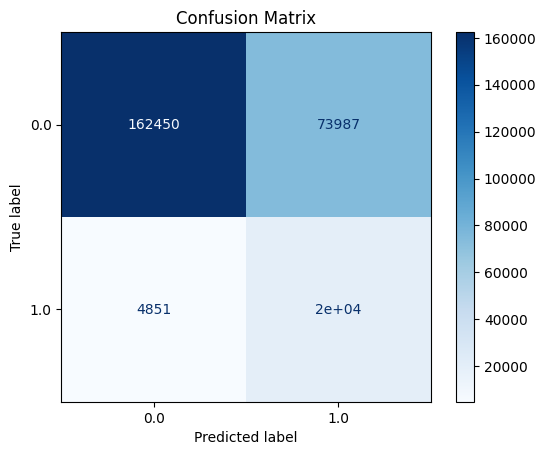

In [ ]:
# test model on 2015 dataset
# Create 2015 dataset without DiffWalk or Veggies Features
modified_heart_df_2015 = brfss_2015_df_selected.copy()

X = modified_heart_df_2015.drop('HeartDiseaseorAttack', axis=1)
y = modified_heart_df_2015['HeartDiseaseorAttack']

X = pca.transform(X)

# Using random forest model
y_pred = rf_clf_lc.predict(X)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print("Metrics for Random Forest Classifier on Prospective 2015 Dataset")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **14.3.1: Results**
Below are the performance metric changes we observed between the Random Forest based on the 2013 dataset and that model performance on the 2015 dataset.

Accuracy: 70.2% --> 69.84%

Precision: 22.0% --> 21.35%

Recall: 80.4% --> 80.54%

F1 Score: 34.5% --> 33.75%

- Accuracy, Precision, and F1 Score all decreased very slightly (< 1%), while Recall increased very slightly (< 0.5%).
- As noted previously, our primary metric of interest is recall and while it is promising to see it increase by a small amount, there is still less than one percent decrease for each of the other metrics. Therefore these shifts likely produce a negligible effect overall.
- Overall, it is promising to see all four metrics change very slightly after applying the 2015 dataset to the 2013-trained model.
- As such, we can tentatively hypothesize that using a model from two years in the past is a relatively reliable predictor of the future.

## **14.4: Applying Logistic Regression Classifier to 2015 Dataset**

Metrics for Logistic Regression Classifier on Prospective 2015 Dataset
Accuracy: 0.7565463254874354
Precision: 0.24724384764094257
Recall: 0.7592154345994946
F1 Score: 0.37301329234286157


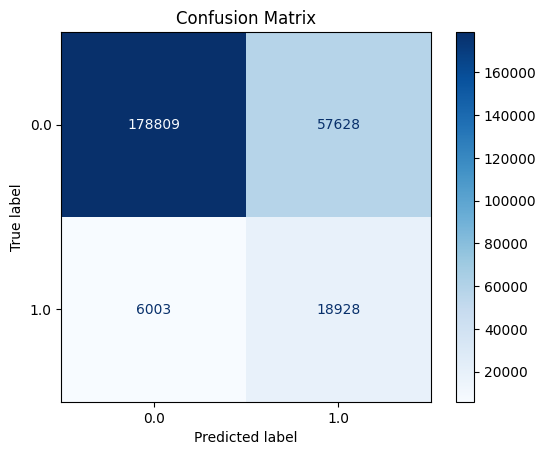

In [ ]:
# test model on 2015 dataset

# Using logistic regression model
y_pred = clf_lr_lc.predict(X)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print the evaluation metrics
print("Metrics for Logistic Regression Classifier on Prospective 2015 Dataset")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **14.3.1: Results**
- - The metrics for the 2013 trained logistic regression model appears to also perform poorly at for generalizing to future unseen data, since all evaluation metrics drop significantly.
-- Accuracy: 75.8% -> 75.7%
-- Precision: 25.0% -> 24.7%
-- Recall: 75.0% -> 75.9%
-- F1 Score:37.5% -> 37.3%

- Upon testing and validating the random forest and logistic regression classifier trained on the 2013 dataset using both 2011 and 2015 datasets, it was observed that the evaluation metrics were fairly consistent, inferring a good generalization of the models to unseen data from different time periods.

- The random forest classifier still demonstrated greater recall, which is crucial for accurately identifying cases of heart disease. Despite the logistic regression model being simpler and interpretable, the random forest's ability to maintain stable performance and achieve higher recall across different years makes it a preferred choice for predicting heart disease/attacks in this scenario. Thus, the random forest model is favored over logistic regression for its consistency and superior recall across multiple years of data.

#**15. Conclusion**

##**15.1: Results**

After implementing and testing multiple different models and hyperparameter tuning, our current best model for predicting heart disease/attacks is the random forest classifier. The performance metrics of our **Random Forest** classifier on the **2013** dataset are as follows:

**2013 Test Set:**

- Accuracy: 70.2%

- Precision: 22.0%

- Recall: 80.4%

- F1 Score: 34.5%

We evaluated the robustness of our classifier by testing it against separate datasets from the years 2011 and 2015. The performance metrics on these additional datasets are consistent when looking at accuracy, precision, recall, and F1 score.

**2011 Test Set:**

- Accuracy: 71.19%

- Precision: 21.87%

- Recall: 79.62%

- F1 Score: 34.31%



**2015 Test Set:**

- Accuracy: 69.84%

- Precision: 21.35%

- Recall: 80.54%

- F1 Score: 33.75%

Overall, these results demonstrate that our random forest classifier provides reliable predictions of heart disease/attacks across the years 2011 to 2015. Therefore, we could hypothesize that building random forest models around other time frames with similarly small margins (<= 2 years) would yield robust predictive models.

##**15.2: Significance**

- Using demographic information, biometric measures, health history, and other potentially significant factors we can continue updating a robust heart disease/attack prediction model.
- Given a strong prediction model, healthcare providers can better assess individual risk profiles, implement preventive interventions, and optimize patient care to reduce the burden of heart disease and improve cardiovascular outcomes.
- We can create a future where individuals also have more control of their health outcomes. Individuals can potentially assess their own risk of heart disease/attacks if we provide them a model they can input their own features and assess their level of risk.
- Overall, our goal is to combat the #1 global cause of death, heart disease.

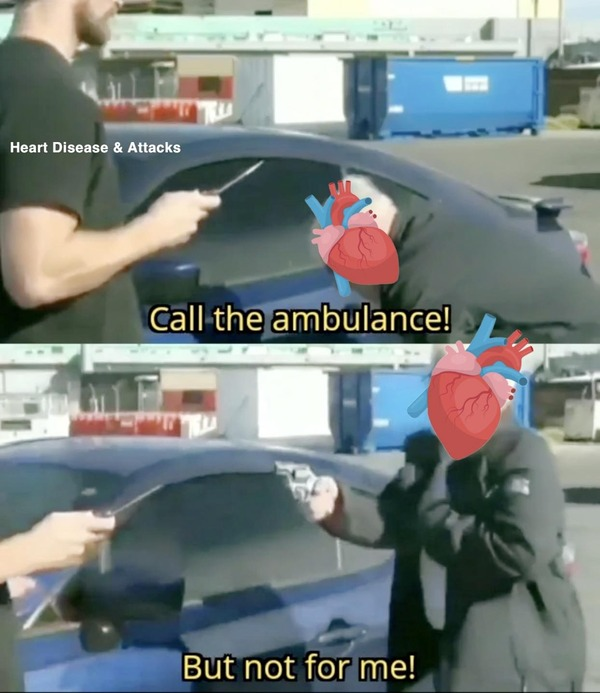

##**15.3: Future Improvements**
- Continue more robust hyperparameter tuning to further improve our evaluation metrics with an emphasis on recall.
- Explore other regularization methods.
- Our current work focuses on testing our model on data within a 2-year margin, however it could be useful to also see how models perform on data from a wider gap of time, such as seeing how 2003 and 2023 data performs on a 2013 data-based model.
- We could also focus on making a more robust model across a large time-range by training and testing it on data from most or all the available data. In the case of BRFSS, this would span from 1988 to 2022, giving us just over three decades to work with.
- It could also be beneficial to utilize a dataset/survey more oriented towards heart disease and heart attacks, primarily in that it consistently asks questions related to these 20 features every year, rather than every other year (or less). This would theoretically produce a model trained on a larger, more consistent and therefore more reliable dataset.
- Explore other features available from the original dataset.